# **Import Files**

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import learning_curve,train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.impute import SimpleImputer,KNNImputer
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
import os
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

In [2]:
df = pd.read_csv(r"C:\Year Three\Semester One\Machine learning\ML Phase 2\health_lifestyle_classification.csv")

# **Explore The Dataset**

In [3]:
df.head()

survey_code  age  gender      height     weight        bmi  bmi_estimated  \
0            1   56    Male  173.416872  56.886640  18.915925      18.915925   
1            2   69  Female  163.207380  97.799859  36.716278      36.716278   
2            3   46    Male  177.281966  80.687562  25.673050      25.673050   
3            4   32  Female  172.101255  63.142868  21.318480      21.318480   
4            5   60  Female  163.608816  40.000000  14.943302      14.943302   

   bmi_scaled  bmi_corrected  waist_size  ...  sunlight_exposure  \
0   56.747776      18.989117   72.165130  ...               High   
1  110.148833      36.511417   85.598889  ...               High   
2   77.019151      25.587429   90.295030  ...               High   
3   63.955440      21.177109  100.504211  ...               High   
4   44.829907      14.844299   69.021150  ...               High   

   meals_per_day  caffeine_intake  family_history  pet_owner  \
0              5         Moderate              No        Yes   
1              5             High             Yes         No   
2              4         Moderate              No         No   
3              1              NaN              No        Yes   
4              1             High             Yes        Yes   

   electrolyte_level gene_marker_flag  environmental_risk_score  \
0                  0              1.0                       5.5   
1                  0              1.0                       5.5   
2                  0              1.0                       5.5   
3                  0              1.0                       5.5   
4                  0              1.0                       5.5   

   daily_supplement_dosage   target  
0                -2.275502  healthy  
1                 6.239340  healthy  
2                 5.423737  healthy  
3                 8.388611  healthy  
4                 0.332622  healthy  

[5 rows x 48 columns]

In [4]:
df.tail()

survey_code  age  gender      height     weight        bmi  \
99995        99996   53    Male  177.202253  54.303671  17.293811   
99996        99997   22    Male  180.802297  40.033853  12.246712   
99997        99998   37    Male  185.540653  84.536847  24.556580   
99998        99999   72  Female  181.796786  56.923335  17.223362   
99999       100000   37    Male  175.716378  93.017286  30.125841   

       bmi_estimated  bmi_scaled  bmi_corrected  waist_size  ...  \
99995      17.293811   51.881433      17.227616   88.740028  ...   
99996      12.246712   36.740135      12.159473  103.659560  ...   
99997      24.556580   73.669741      24.172944   98.920422  ...   
99998      17.223362   51.670087      17.715475   54.559079  ...   
99999      30.125841   90.377523      30.254072   70.743851  ...   

       sunlight_exposure  meals_per_day  caffeine_intake  family_history  \
99995           Moderate              1             High              No   
99996           Moderate              5              NaN             Yes   
99997                Low              5              NaN              No   
99998                Low              4             High             Yes   
99999               High              4         Moderate             Yes   

       pet_owner  electrolyte_level gene_marker_flag  \
99995        Yes                  0              1.0   
99996         No                  0              1.0   
99997         No                  0              1.0   
99998        Yes                  0              1.0   
99999         No                  0              1.0   

       environmental_risk_score  daily_supplement_dosage    target  
99995                       5.5                 3.477124   healthy  
99996                       5.5                 1.609656   healthy  
99997                       5.5                -9.736463   healthy  
99998                       5.5                -4.779376   healthy  
99999                       5.5                -2.010351  diseased  

[5 rows x 48 columns]

In [5]:
df.describe()

survey_code            age         height         weight  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    50000.500000      48.525990     170.023707      70.064862   
std     28867.657797      17.886768       9.982798      14.693667   
min         1.000000      18.000000     140.000000      40.000000   
25%     25000.750000      33.000000     163.306615      59.856938   
50%     50000.500000      48.000000     170.016778      69.924141   
75%     75000.250000      64.000000     176.728920      80.027418   
max    100000.000000      79.000000     210.000000     139.250894   

                 bmi  bmi_estimated     bmi_scaled  bmi_corrected  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       24.493876      24.493876      73.481627      24.494140   
std         5.951069       5.951069      17.853206       5.954184   
min         9.988495       9.988495      29.965484       9.893845   
25%        20.271405      20.271405      60.814215      20.271059   
50%        24.156734      24.156734      72.470201      24.151699   
75%        28.258696      28.258696      84.776088      28.247648   
max        59.234792      59.234792     177.704377      59.142646   

          waist_size  blood_pressure  ...   water_intake    screen_time  \
count  100000.000000    92331.000000  ...  100000.000000  100000.000000   
mean       84.933043      119.980149  ...       2.006373       6.021525   
std        12.040314       15.015503  ...       0.688868       2.933835   
min        34.093185       59.128168  ...       0.500000       0.000000   
25%        76.795185      109.812060  ...       1.532011       3.971318   
50%        84.957139      119.951794  ...       2.000659       5.991171   
75%        93.018713      130.120621  ...       2.473047       8.024470   
max       133.153631      184.439195  ...       5.000000      16.000000   

        stress_level  mental_health_score        income  meals_per_day  \
count  100000.000000        100000.000000  91530.000000  100000.000000   
mean        4.991600             5.004680   4038.127284       2.998720   
std         3.154997             3.164228   1930.025678       1.414786   
min         0.000000             0.000000    500.000000       1.000000   
25%         2.000000             2.000000   2665.402843       2.000000   
50%         5.000000             5.000000   4004.601345       3.000000   
75%         8.000000             8.000000   5360.012694       4.000000   
max        10.000000            10.000000  12029.409353       5.000000   

       electrolyte_level  gene_marker_flag  environmental_risk_score  \
count           100000.0           89526.0                  100000.0   
mean                 0.0               1.0                       5.5   
std                  0.0               0.0                       0.0   
min                  0.0               1.0                       5.5   
25%                  0.0               1.0                       5.5   
50%                  0.0               1.0                       5.5   
75%                  0.0               1.0                       5.5   
max                  0.0               1.0                       5.5   

       daily_supplement_dosage  
count            100000.000000  
mean                  0.015726  
std                   5.764489  
min                  -9.999895  
25%                  -4.980501  
50%                   0.015589  
75%                   5.008424  
max                   9.999966  

[8 rows x 30 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

In [7]:
df.shape

(100000, 48)

In [8]:
df['target'].value_counts()

target
healthy     70097
diseased    29903
Name: count, dtype: int64

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [10]:
df.isnull().sum()

survey_code                     0
age                             0
gender                          0
height                          0
weight                          0
bmi                             0
bmi_estimated                   0
bmi_scaled                      0
bmi_corrected                   0
waist_size                      0
blood_pressure               7669
heart_rate                  14003
cholesterol                     0
glucose                         0
insulin                     15836
sleep_hours                     0
sleep_quality                   0
work_hours                      0
physical_activity               0
daily_steps                  8329
calorie_intake                  0
sugar_intake                    0
alcohol_consumption         42387
smoking_level                   0
water_intake                    0
screen_time                     0
stress_level                    0
mental_health_score             0
mental_health_support           0
education_leve

# **Data Visualization**

## Show Outliers

* The dataset has many outliers, but it is logical based on some real researchs except insulin <= 1 and glucose < 50

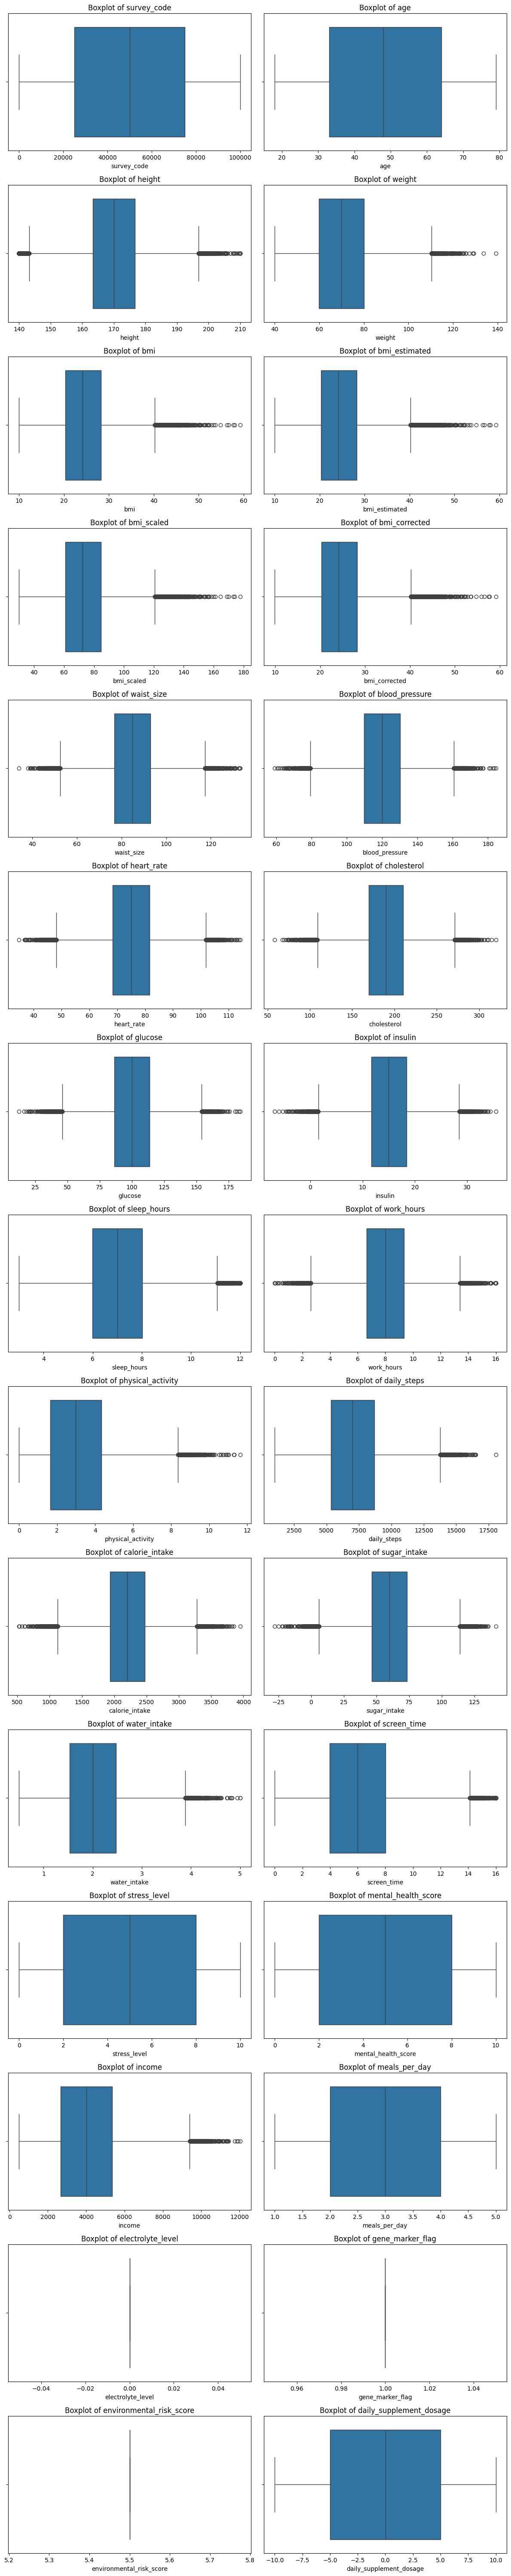

In [11]:
num_of_columns = 2
numeric_features = df.select_dtypes(include=['int64','float64']).columns
num_of_features = len(numeric_features)
num_of_rows = math.ceil(num_of_features/num_of_columns)

fig, axes = plt.subplots(num_of_rows,num_of_columns,figsize=(12,4 * num_of_rows))
axes = axes.flatten()

for row,col in enumerate(numeric_features):
    sns.boxplot(data=df, x=col ,ax=axes[row])
    axes[row].set_title(f"Boxplot of {col}")
    axes[row].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

## Correlation Matrix

* there are 5 features that have high correlation between them,so it can be drop 4 and leave 1 for training process

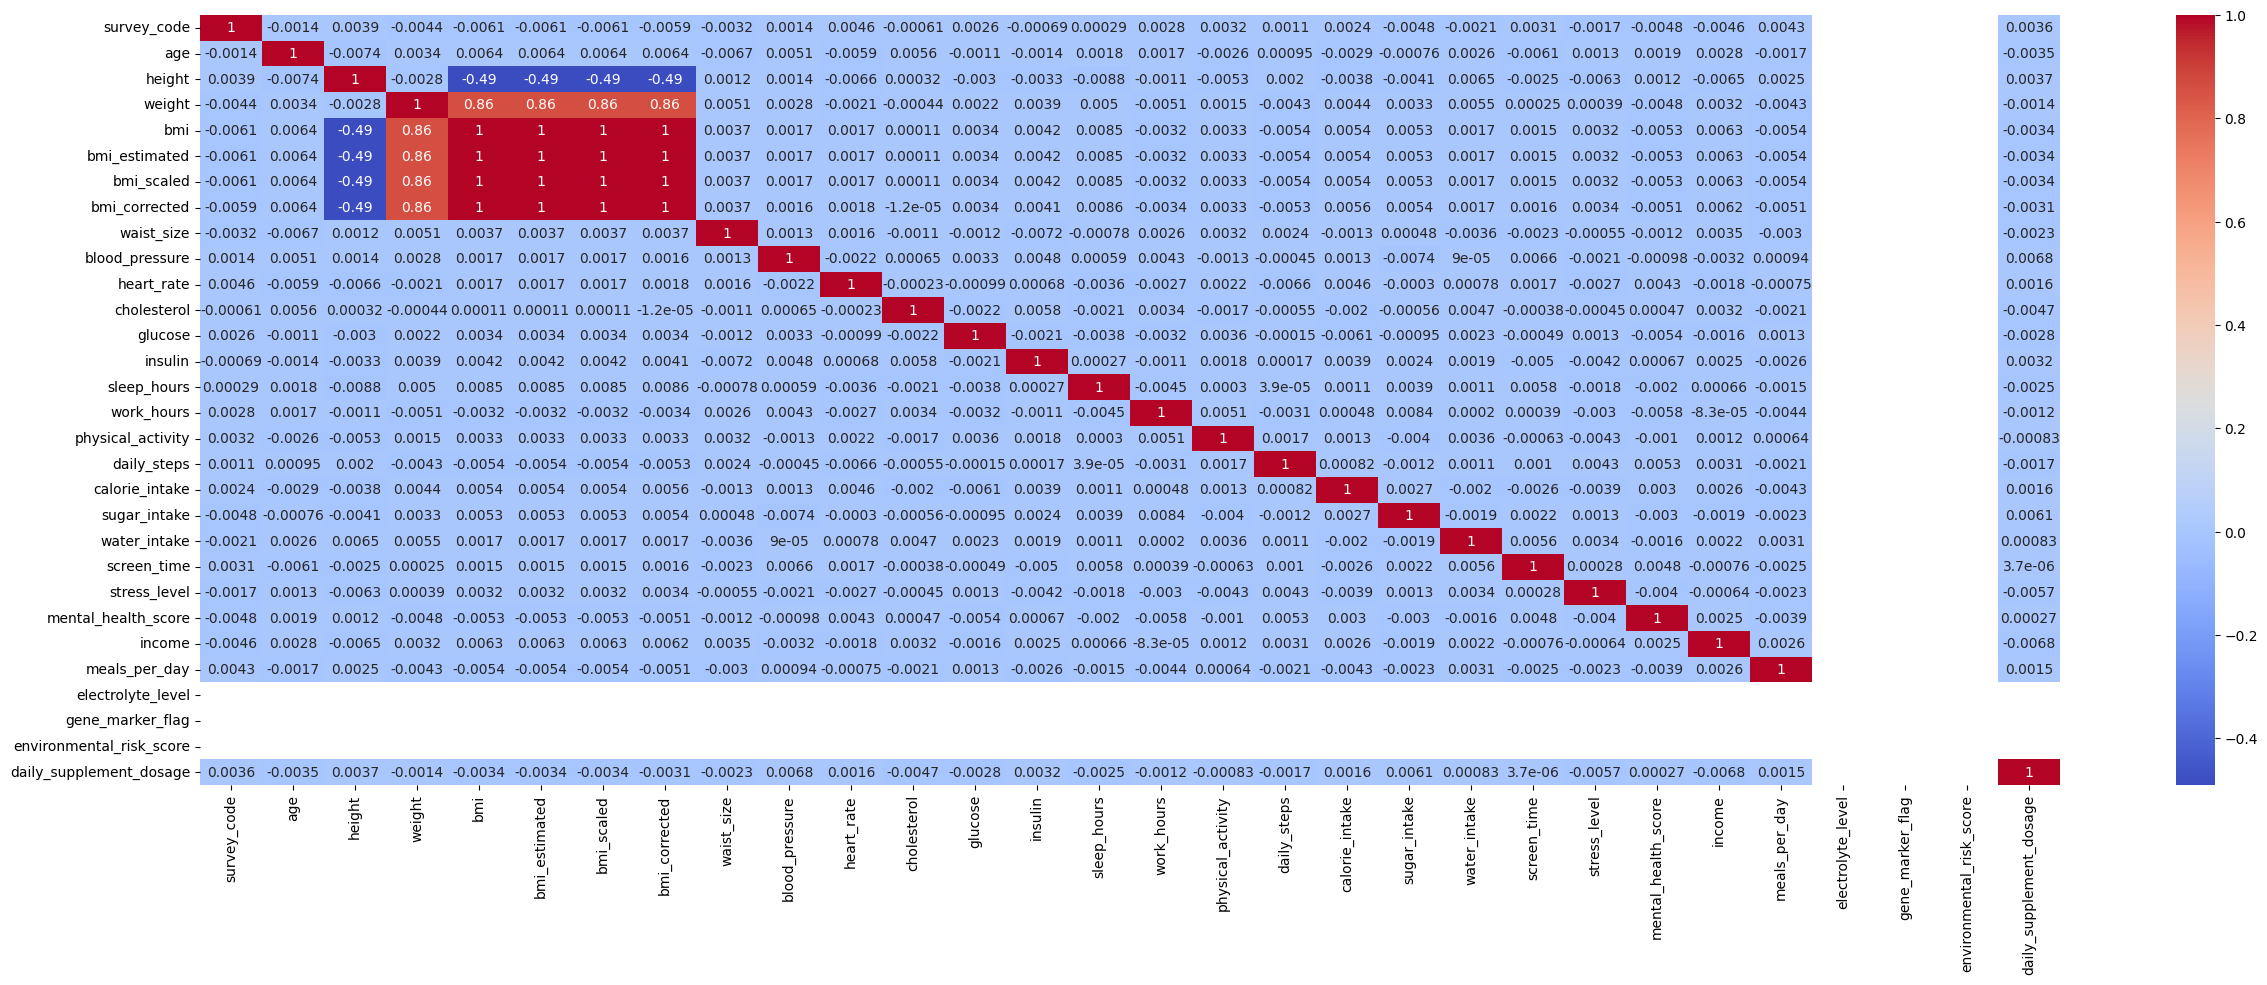

In [12]:
corr_map = df.corr(numeric_only = True)
plt.figure(figsize=(30, 10))
sns.heatmap(corr_map,annot=True,cmap='coolwarm')
plt.show()

## Show Nulls

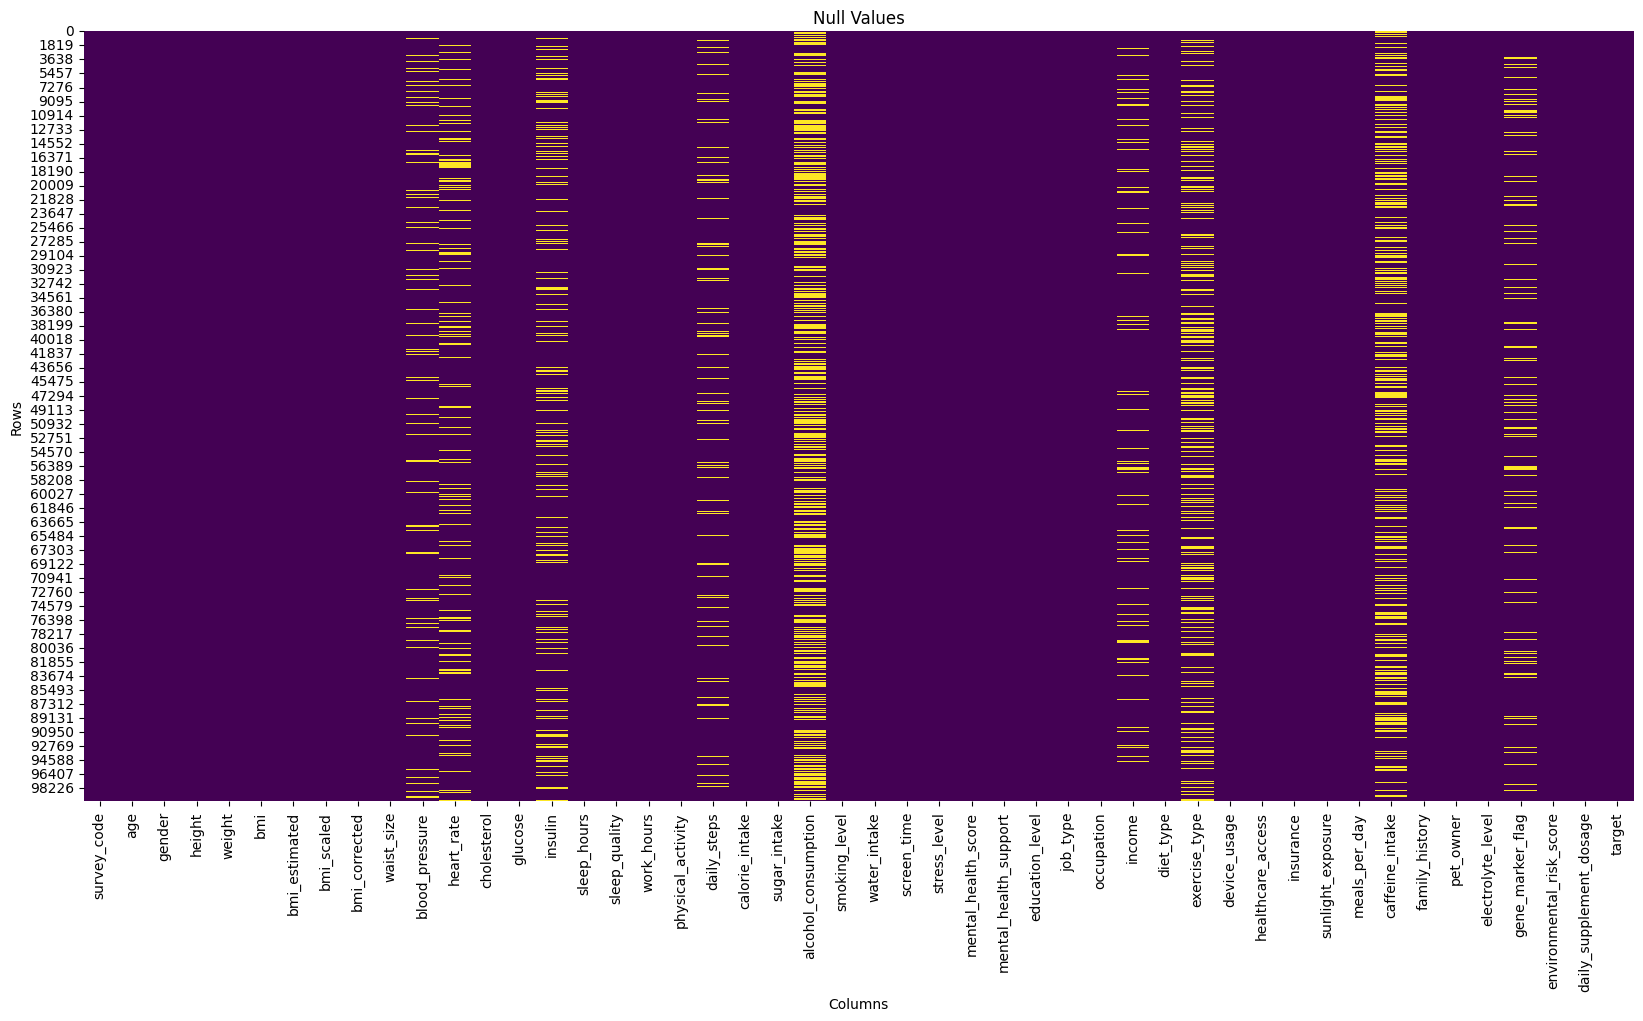

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Null Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

## Class Distribution

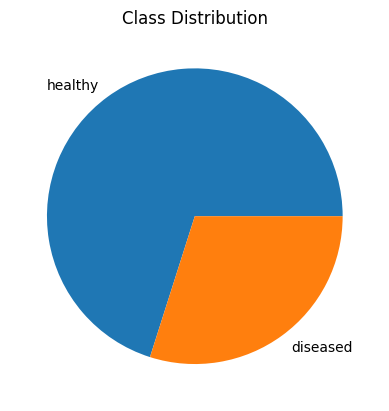

In [14]:
plt.pie(df['target'].value_counts(), labels=df['target'].value_counts().index)
plt.title("Class Distribution")
plt.show()

## Numerical Features Distribution

* survey_code will drop because it has very high unique values, and electrolyte_level, gene_marker_flag and environmental_risk_score becasue they have only one unique value

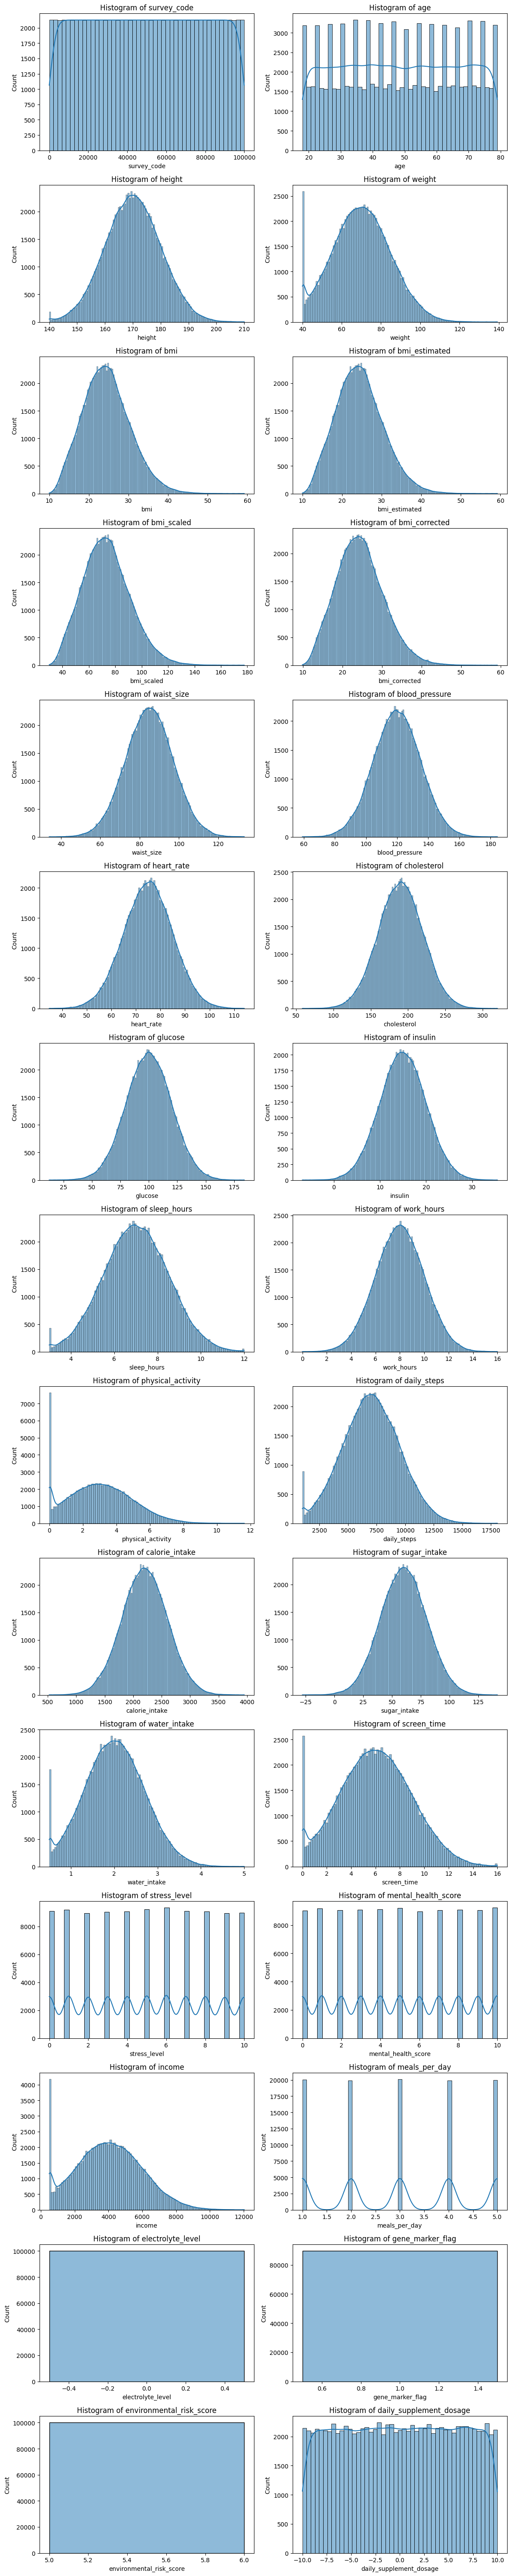

In [15]:
num_of_columns = 2
numeric_features = df.select_dtypes(include=['int64','float64']).columns
num_of_features = len(numeric_features)
num_of_rows = math.ceil(num_of_features/num_of_columns)

fig, axes = plt.subplots(num_of_rows,num_of_columns,figsize=(12,4 * num_of_rows))
axes = axes.flatten()

for row,col in enumerate(numeric_features):
    sns.histplot(data=df, x=col ,ax=axes[row],kde=True)
    axes[row].set_title(f"Histogram of {col}")
    axes[row].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

# **Data Preprocessing**

## drop unnecessary columns

In [16]:
df.drop(columns=['survey_code','electrolyte_level','gene_marker_flag','environmental_risk_score','bmi','bmi_corrected','bmi_scaled','bmi_estimated','occupation','job_type'],axis=1,inplace=True)
df

age  gender      height     weight  waist_size  blood_pressure  \
0       56    Male  173.416872  56.886640   72.165130      118.264254   
1       69  Female  163.207380  97.799859   85.598889      117.917986   
2       46    Male  177.281966  80.687562   90.295030      123.073698   
3       32  Female  172.101255  63.142868  100.504211      148.173453   
4       60  Female  163.608816  40.000000   69.021150      150.613181   
...    ...     ...         ...        ...         ...             ...   
99995   53    Male  177.202253  54.303671   88.740028      135.090834   
99996   22    Male  180.802297  40.033853  103.659560      135.181795   
99997   37    Male  185.540653  84.536847   98.920422      146.504768   
99998   72  Female  181.796786  56.923335   54.559079      100.986759   
99999   37    Male  175.716378  93.017286   70.743851       95.728717   

       heart_rate  cholesterol     glucose    insulin  ...  device_usage  \
0       60.749825   214.580523  103.008176        NaN  ...          High   
1       66.463696   115.794002  116.905134  10.131597  ...      Moderate   
2       76.043212   138.134787   89.180302        NaN  ...          High   
3       68.781981   203.017447  128.375798  18.733179  ...           Low   
4       92.335358   200.412439   94.813332  16.038701  ...           Low   
...           ...          ...         ...        ...  ...           ...   
99995   75.338212   192.581246  130.804751  17.831593  ...      Moderate   
99996   56.334527   216.103598  131.181871  17.805608  ...          High   
99997   74.864059   178.481690   84.087533        NaN  ...           Low   
99998   64.719997   158.981418   83.094321  20.140967  ...           Low   
99999         NaN   211.742356   82.268003  11.178592  ...           Low   

      healthcare_access  insurance  sunlight_exposure  meals_per_day  \
0                  Poor         No               High              5   
1              Moderate         No               High              5   
2                  Good        Yes               High              4   
3              Moderate         No               High              1   
4              Moderate        Yes               High              1   
...                 ...        ...                ...            ...   
99995              Poor         No           Moderate              1   
99996          Moderate         No           Moderate              5   
99997              Good        Yes                Low              5   
99998              Poor        Yes                Low              4   
99999          Moderate         No               High              4   

       caffeine_intake  family_history pet_owner daily_supplement_dosage  \
0             Moderate              No       Yes               -2.275502   
1                 High             Yes        No                6.239340   
2             Moderate              No        No                5.423737   
3                  NaN              No       Yes                8.388611   
4                 High             Yes       Yes                0.332622   
...                ...             ...       ...                     ...   
99995             High              No       Yes                3.477124   
99996              NaN             Yes        No                1.609656   
99997              NaN              No        No               -9.736463   
99998             High             Yes       Yes               -4.779376   
99999         Moderate             Yes        No               -2.010351   

         target  
0       healthy  
1       healthy  
2       healthy  
3       healthy  
4       healthy  
...         ...  
99995   healthy  
99996   healthy  
99997   healthy  
99998   healthy  
99999  diseased  

[100000 rows x 38 columns]

## Data Splitting

In [17]:
x = df.drop('target',axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

## handling Outliers

In [19]:
train_full = pd.concat([x_train, y_train], axis = 1)

train_full = train_full[train_full['glucose'] >= 50]
train_full = train_full[train_full['insulin'] >= 1]


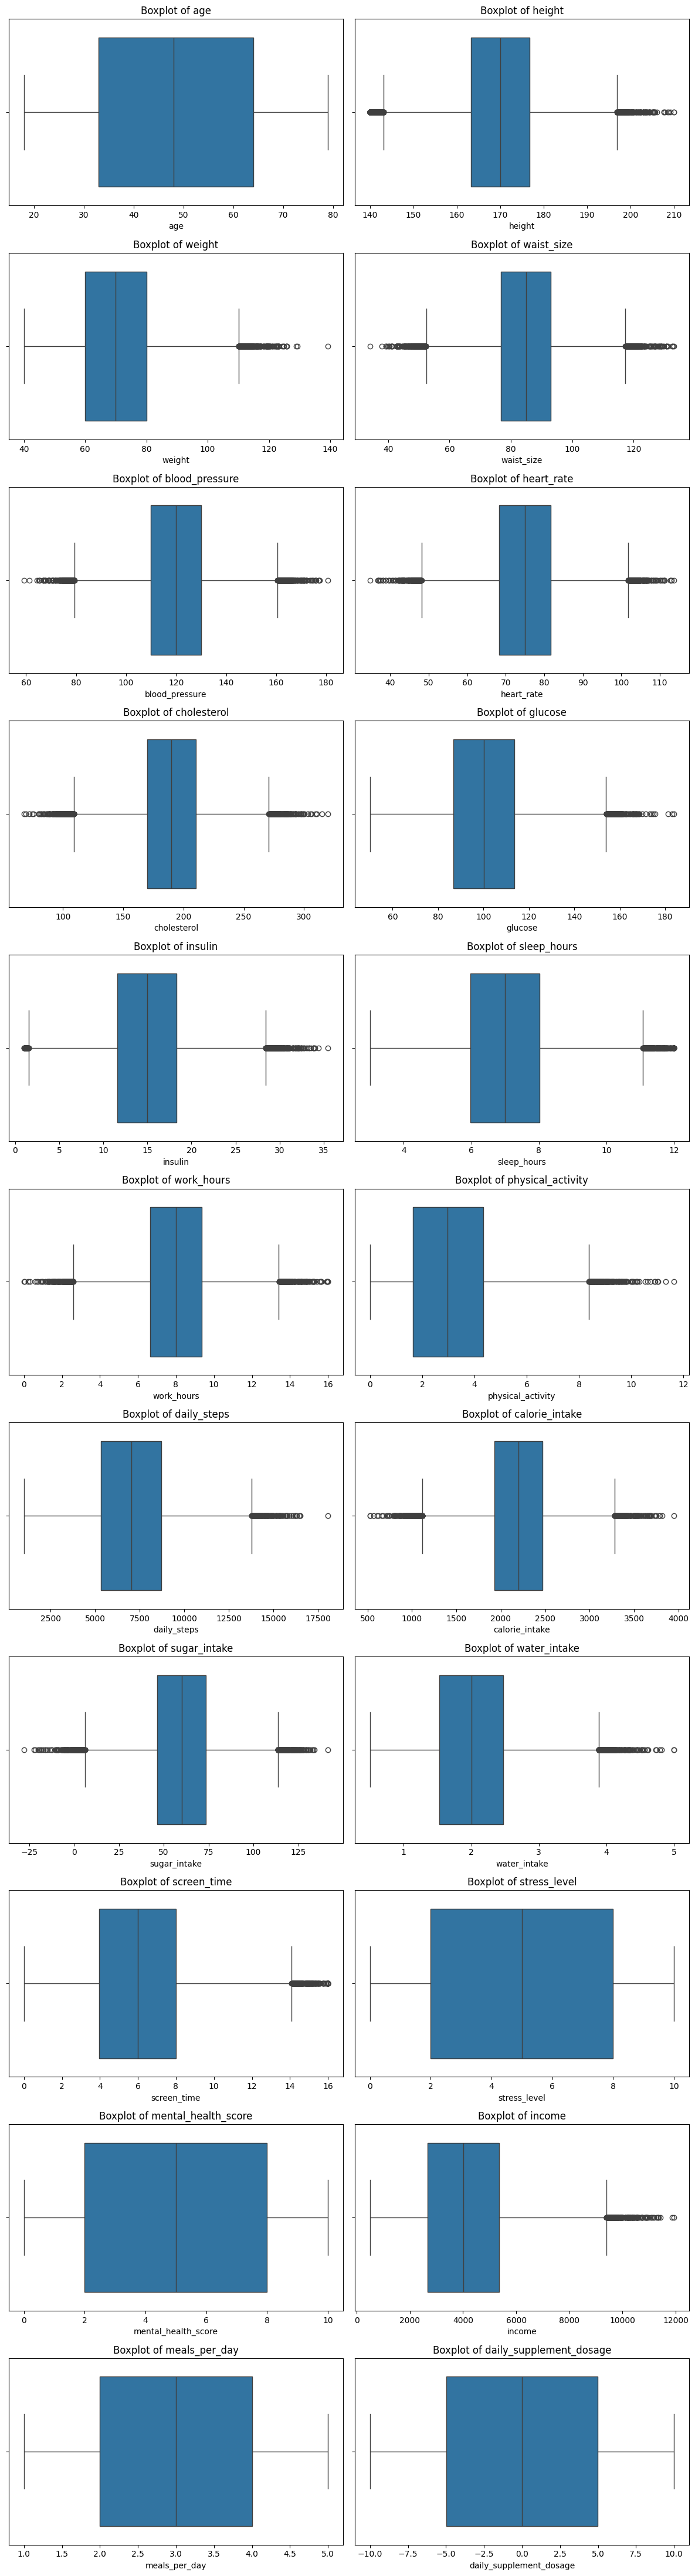

In [20]:
num_of_columns = 2
num_cols = train_full.select_dtypes(include=['int64','float64']).columns
num_of_features = len(num_cols)
num_of_rows = math.ceil(num_of_features/num_of_columns)

fig, axes = plt.subplots(num_of_rows,num_of_columns,figsize=(12,4 * num_of_rows))
axes = axes.flatten()

for row,col in enumerate(num_cols):
    sns.boxplot(data=train_full, x=col ,ax=axes[row])
    axes[row].set_title(f"Boxplot of {col}")
    axes[row].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

## Handling null values

In [21]:
target_col = 'target'
num_cols = train_full.drop(columns=[target_col]).select_dtypes(include=['number']).columns
cat_cols = train_full.drop(columns=[target_col]).select_dtypes(include=['object', 'category']).columns
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
train_full[num_cols] = knn_imputer.fit_transform(train_full[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
train_full[cat_cols] = cat_imputer.fit_transform(train_full[cat_cols])

In [22]:
train_full

age  gender      height     weight  waist_size  blood_pressure  \
3337   32.0  Female  172.345143  58.320401   79.391952      109.961156   
6374   47.0  Female  178.363548  79.621461   85.552866      106.752415   
26578  69.0    Male  182.452538  87.362878   88.153017       96.769803   
63446  77.0  Female  175.180647  84.140216   98.040648      135.113527   
36555  68.0    Male  161.121022  66.607223  110.586106      132.156085   
...     ...     ...         ...        ...         ...             ...   
99705  75.0  Female  172.516743  92.812314   77.853451      125.968662   
89764  72.0    Male  168.080382  75.627136   87.597819      125.288844   
5219   53.0  Female  170.825370  68.988642   94.857578      111.679159   
88805  41.0    Male  165.242491  59.131978   52.920270      109.597283   
60436  26.0  Female  178.215423  52.929882   84.898480      128.812434   

       heart_rate  cholesterol     glucose    insulin  ...  device_usage  \
3337    58.590220   205.244882  135.061225  14.661497  ...          High   
6374    62.751381   200.624004   74.565206  10.855174  ...           Low   
26578   78.983224   172.797071   79.693562  18.655003  ...          High   
63446   82.987081   118.945825  102.012528  13.786371  ...           Low   
36555   84.404297   155.069163  108.266960  17.052767  ...      Moderate   
...           ...          ...         ...        ...  ...           ...   
99705   92.142532   144.834082  114.000248  18.309686  ...          High   
89764   92.192127   193.904982  138.157364  18.439963  ...          High   
5219    67.246318   188.587281  128.308310  14.134966  ...      Moderate   
88805   76.991269   211.630602  108.113735  17.791132  ...           Low   
60436   84.019026   226.621752  122.613915   7.594487  ...          High   

      healthcare_access  insurance  sunlight_exposure  meals_per_day  \
3337               Poor        Yes                Low            2.0   
6374               Poor         No                Low            1.0   
26578              Poor        Yes               High            3.0   
63446              Poor         No                Low            5.0   
36555              Poor        Yes           Moderate            2.0   
...                 ...        ...                ...            ...   
99705          Moderate         No                Low            3.0   
89764              Good        Yes           Moderate            4.0   
5219           Moderate         No                Low            2.0   
88805              Good        Yes           Moderate            3.0   
60436          Moderate        Yes               High            3.0   

       caffeine_intake  family_history pet_owner daily_supplement_dosage  \
3337          Moderate             Yes        No                7.311929   
6374          Moderate             Yes        No               -0.358541   
26578             High             Yes        No               -3.273304   
63446             High             Yes        No               -6.281029   
36555         Moderate              No       Yes               -0.323059   
...                ...             ...       ...                     ...   
99705             High              No       Yes                0.144059   
89764         Moderate              No       Yes                4.025801   
5219          Moderate              No       Yes               -7.738576   
88805             High             Yes       Yes                0.962614   
60436             High              No        No               -4.974418   

         target  
3337    healthy  
6374    healthy  
26578  diseased  
63446   healthy  
36555  diseased  
...         ...  
99705   healthy  
89764   healthy  
5219    healthy  
88805   healthy  
60436  diseased  

[66800 rows x 38 columns]

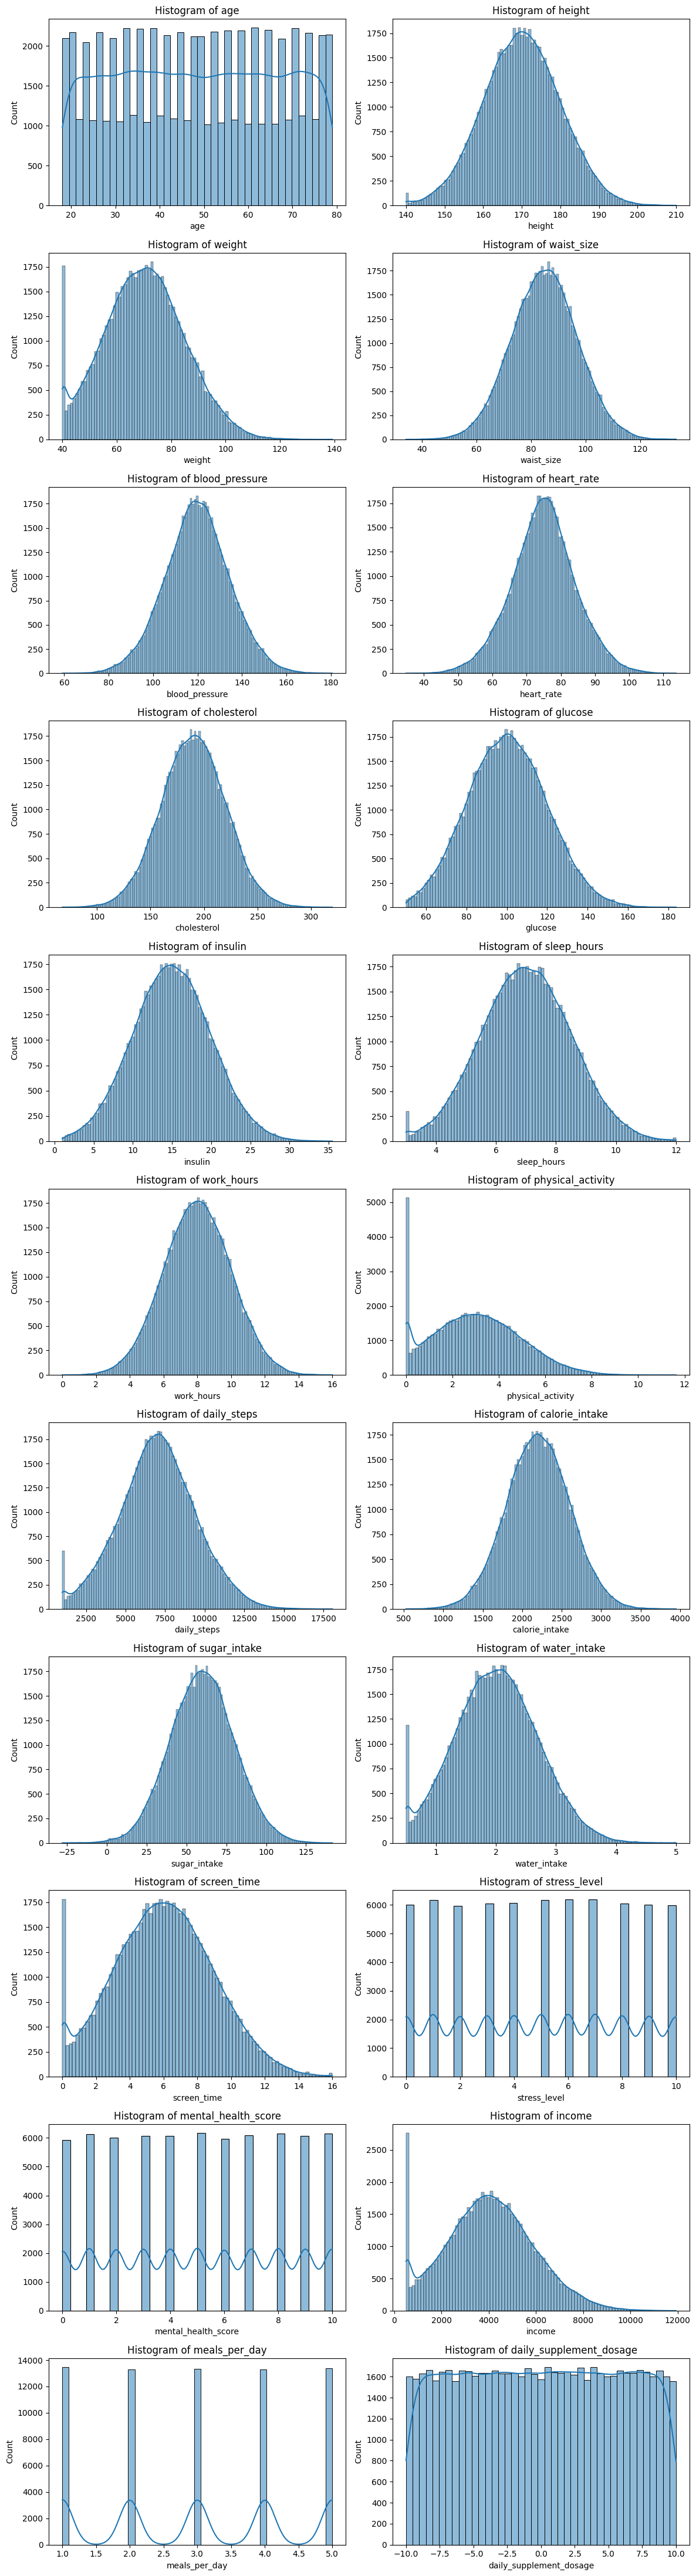

In [23]:
num_of_columns = 2
num_of_features = len(num_cols)
num_of_rows = math.ceil(num_of_features/num_of_columns)

fig, axes = plt.subplots(num_of_rows,num_of_columns,figsize=(12,4 * num_of_rows))
axes = axes.flatten()

for row,col in enumerate(num_cols):
    sns.histplot(data=train_full, x=col ,ax=axes[row],kde=True)
    axes[row].set_title(f"Histogram of {col}")
    axes[row].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

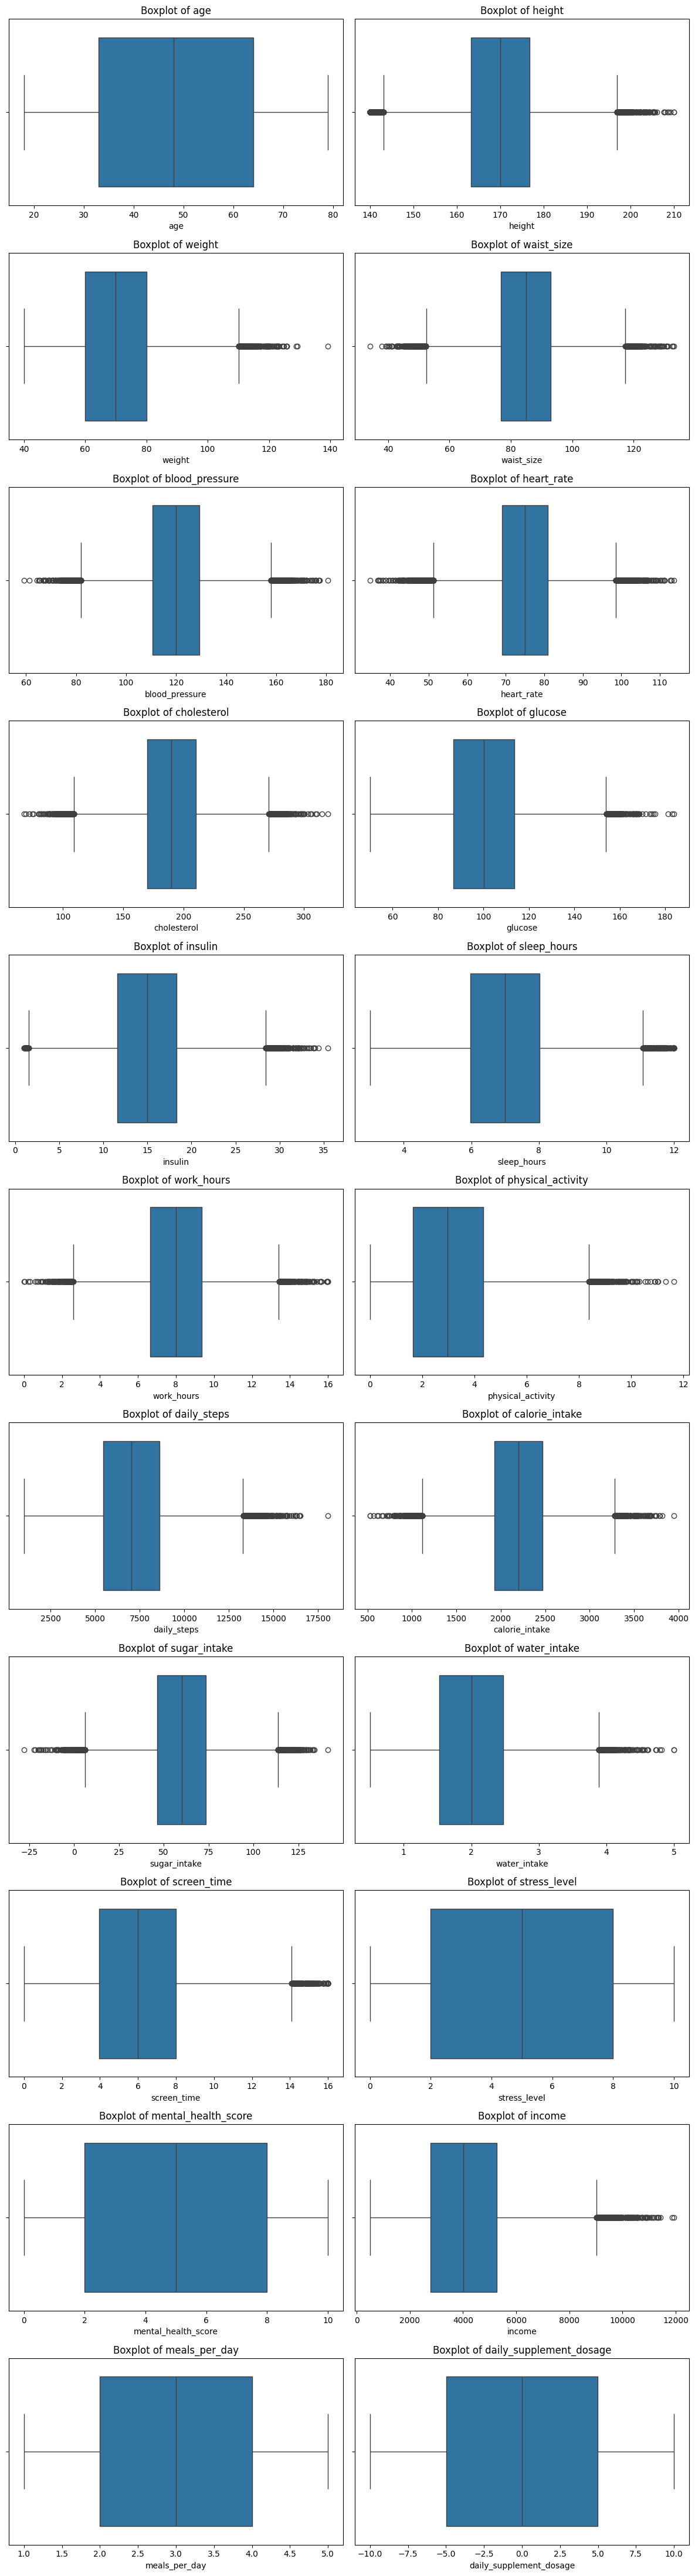

In [24]:
num_of_columns = 2
num_of_features = len(num_cols)
num_of_rows = math.ceil(num_of_features/num_of_columns)

fig, axes = plt.subplots(num_of_rows,num_of_columns,figsize=(12,4 * num_of_rows))
axes = axes.flatten()

for row,col in enumerate(num_cols):
    sns.boxplot(data=train_full, x=col ,ax=axes[row])
    axes[row].set_title(f"Boxplot of {col}")
    axes[row].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

## Normlize The dataset

In [25]:
scaler = MinMaxScaler()
train_full[num_cols] = scaler.fit_transform(train_full[num_cols])

print("Training data split, filtered, imputed, and normalized.")
print(f"Remaining training samples: {len(train_full)}")

Training data split, filtered, imputed, and normalized.
Remaining training samples: 66800


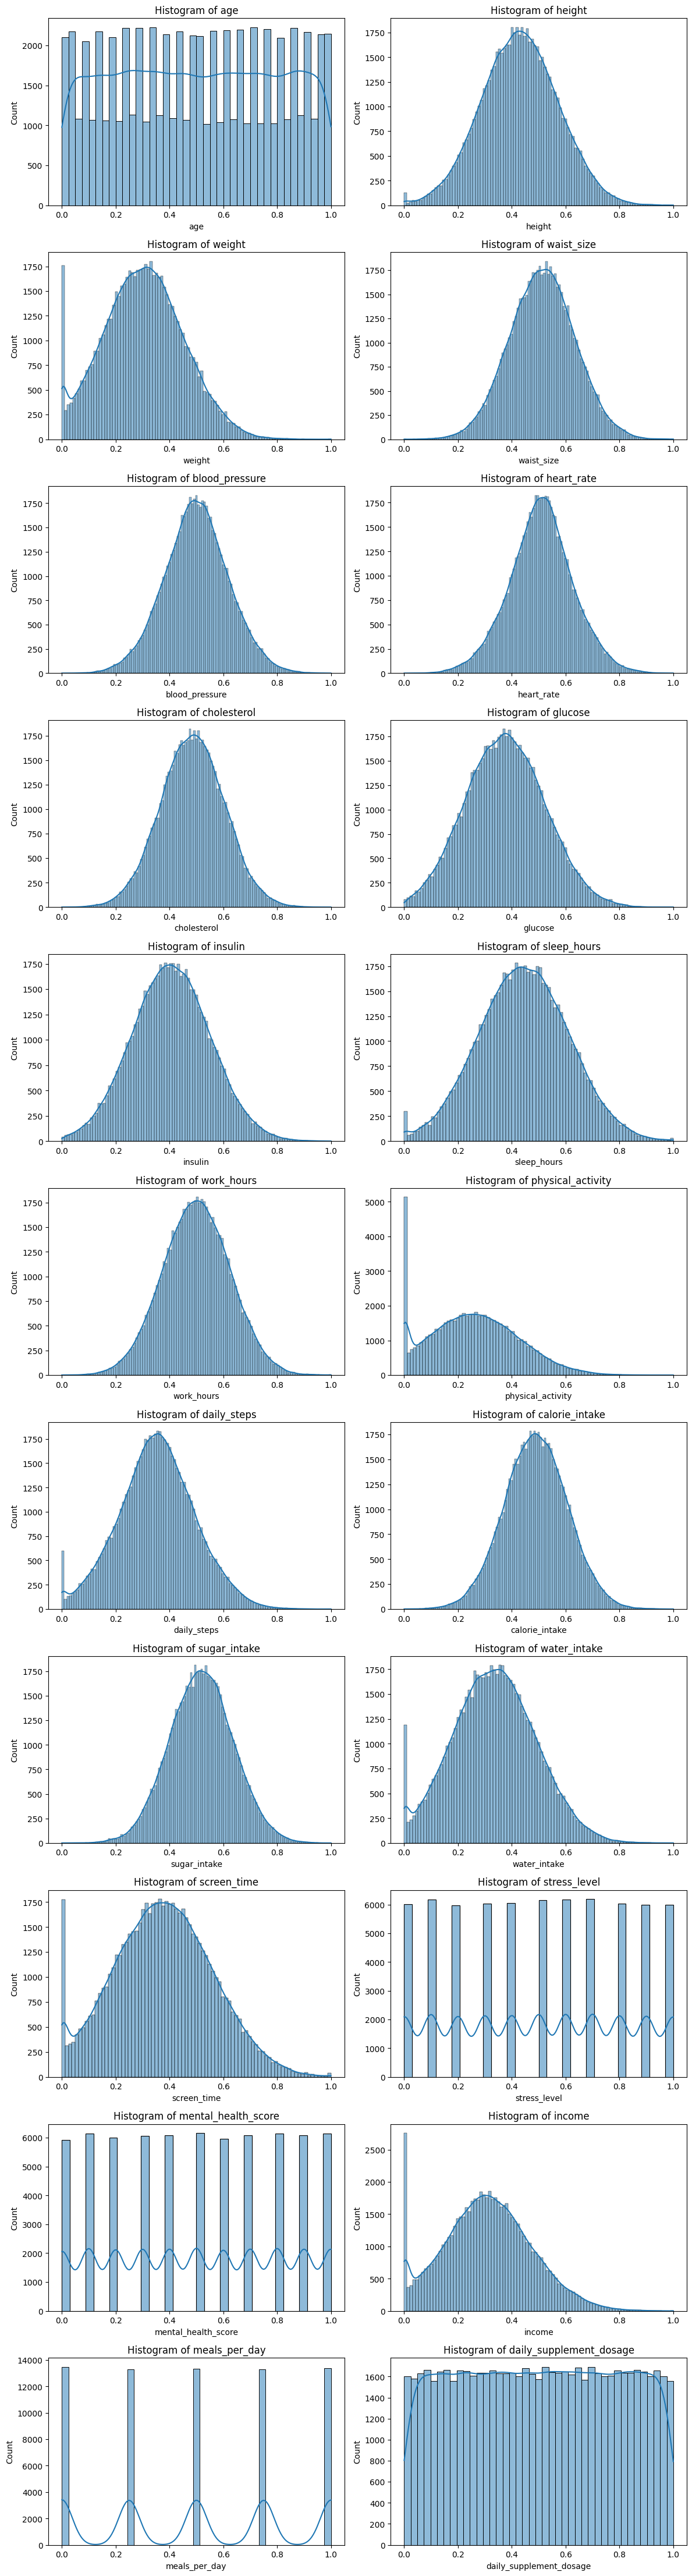

In [26]:
num_of_columns = 2
num_of_features = len(numeric_features)
num_of_rows = math.ceil(num_of_features/num_of_columns)

fig, axes = plt.subplots(num_of_rows,num_of_columns,figsize=(12,4 * num_of_rows))
axes = axes.flatten()

for row,col in enumerate(num_cols):
    sns.histplot(data=train_full, x=col ,ax=axes[row],kde=True)
    axes[row].set_title(f"Histogram of {col}")
    axes[row].set_xlabel(f'{col}')

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [27]:
train_full_label = train_full.copy()
train_full_onehot = train_full.copy()

In [28]:
train_full[cat_cols]

gender sleep_quality alcohol_consumption smoking_level  \
3337   Female     Excellent           Regularly         Heavy   
6374   Female          Poor        Occasionally         Heavy   
26578    Male          Good        Occasionally    Non-smoker   
63446  Female          Poor        Occasionally    Non-smoker   
36555    Male     Excellent           Regularly         Heavy   
...       ...           ...                 ...           ...   
99705  Female          Poor           Regularly         Heavy   
89764    Male          Poor           Regularly         Light   
5219   Female     Excellent           Regularly         Light   
88805    Male          Good        Occasionally         Light   
60436  Female          Fair        Occasionally         Light   

      mental_health_support education_level   diet_type exercise_type  \
3337                     No             PhD       Vegan        Cardio   
6374                     No        Bachelor  Vegetarian      Strength   
26578                    No     High School  Vegetarian         Mixed   
63446                   Yes        Bachelor  Vegetarian        Cardio   
36555                    No          Master        Keto         Mixed   
...                     ...             ...         ...           ...   
99705                    No        Bachelor       Vegan      Strength   
89764                    No     High School       Vegan        Cardio   
5219                     No             PhD       Vegan      Strength   
88805                    No             PhD  Vegetarian      Strength   
60436                   Yes          Master    Omnivore        Cardio   

      device_usage healthcare_access insurance sunlight_exposure  \
3337          High              Poor       Yes               Low   
6374           Low              Poor        No               Low   
26578         High              Poor       Yes              High   
63446          Low              Poor        No               Low   
36555     Moderate              Poor       Yes          Moderate   
...            ...               ...       ...               ...   
99705         High          Moderate        No               Low   
89764         High              Good       Yes          Moderate   
5219      Moderate          Moderate        No               Low   
88805          Low              Good       Yes          Moderate   
60436         High          Moderate       Yes              High   

      caffeine_intake family_history pet_owner  
3337         Moderate            Yes        No  
6374         Moderate            Yes        No  
26578            High            Yes        No  
63446            High            Yes        No  
36555        Moderate             No       Yes  
...               ...            ...       ...  
99705            High             No       Yes  
89764        Moderate             No       Yes  
5219         Moderate             No       Yes  
88805            High            Yes       Yes  
60436            High             No        No  

[66800 rows x 15 columns]

## Label Encoding

In [29]:
target_encoder = LabelEncoder()
train_full_label[target_col] = target_encoder.fit_transform(train_full_label[target_col])
train_full_onehot[target_col] = train_full_label[target_col]

# A. LABEL ENCODING (Loop and SAVE encoders)
label_encoders = {} # Dictionary to store encoders for the test set

for col in cat_cols:
    le = LabelEncoder()
    # Convert to string to ensure consistent types
    train_full_label[col] = le.fit_transform(train_full_label[col].astype(str))
    label_encoders[col] = le # Save encoder

## Onehot Encoding

In [30]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_encoded_data = ohe_encoder.fit_transform(train_full_onehot[cat_cols])

ohe_df = pd.DataFrame(ohe_encoded_data, columns=ohe_encoder.get_feature_names_out(cat_cols), index=train_full_onehot.index)

train_full_onehot = pd.concat([train_full_onehot.drop(columns=cat_cols), ohe_df], axis=1)

print("Encoding complete. Encoders saved for test set.")

Encoding complete. Encoders saved for test set.


In [31]:
train_full_onehot

age    height    weight  waist_size  blood_pressure  heart_rate  \
3337   0.229508  0.462073  0.184587    0.457284        0.418059    0.302011   
6374   0.475410  0.548051  0.399205    0.519478        0.391670    0.354714   
26578  0.836066  0.606465  0.477204    0.545726        0.309571    0.560299   
63446  0.967213  0.502581  0.444734    0.645540        0.624917    0.611010   
36555  0.819672  0.301729  0.268080    0.772184        0.600594    0.628960   
...         ...       ...       ...         ...             ...         ...   
99705  0.934426  0.464525  0.532109    0.441753        0.549708    0.726969   
89764  0.885246  0.401148  0.358960    0.540121        0.544117    0.727597   
5219   0.573770  0.440362  0.292074    0.613407        0.432188    0.411645   
88805  0.377049  0.360607  0.192764    0.190057        0.415067    0.535070   
60436  0.131148  0.545935  0.130275    0.512872        0.573095    0.624080   

       cholesterol   glucose   insulin  sleep_hours  ...  insurance_Yes  \
3337      0.545538  0.635333  0.396315     0.350559  ...            1.0   
6374      0.527219  0.183472  0.285860     0.527216  ...            0.0   
26578     0.416897  0.221778  0.512202     0.572748  ...            1.0   
63446     0.203400  0.388484  0.370920     0.307558  ...            0.0   
36555     0.346613  0.435200  0.465707     0.450200  ...            1.0   
...            ...       ...       ...          ...  ...            ...   
99705     0.306035  0.478023  0.502181     0.644393  ...            0.0   
89764     0.500581  0.658459  0.505962     0.556064  ...            1.0   
5219      0.479498  0.584894  0.381036     0.335463  ...            0.0   
88805     0.570855  0.434055  0.487133     0.000000  ...            1.0   
60436     0.630288  0.542361  0.191239     0.618956  ...            1.0   

       sunlight_exposure_High  sunlight_exposure_Low  \
3337                      0.0                    1.0   
6374                      0.0                    1.0   
26578                     1.0                    0.0   
63446                     0.0                    1.0   
36555                     0.0                    0.0   
...                       ...                    ...   
99705                     0.0                    1.0   
89764                     0.0                    0.0   
5219                      0.0                    1.0   
88805                     0.0                    0.0   
60436                     1.0                    0.0   

       sunlight_exposure_Moderate  caffeine_intake_High  \
3337                          0.0                   0.0   
6374                          0.0                   0.0   
26578                         0.0                   1.0   
63446                         0.0                   1.0   
36555                         1.0                   0.0   
...                           ...                   ...   
99705                         0.0                   1.0   
89764                         1.0                   0.0   
5219                          0.0                   0.0   
88805                         1.0                   1.0   
60436                         0.0                   1.0   

       caffeine_intake_Moderate  family_history_No  family_history_Yes  \
3337                        1.0                0.0                 1.0   
6374                        1.0                0.0                 1.0   
26578                       0.0                0.0                 1.0   
63446                       0.0                0.0                 1.0   
36555                       1.0                1.0                 0.0   
...                         ...                ...                 ...   
99705                       0.0                1.0                 0.0   
89764                       1.0                1.0                 0.0   
5219                        1.0                1.0                 0.0   
88805                       0.0         

## Return the data to original split

In [32]:
 x_label_train = train_full_label.drop(columns=['target'])
 y_label_train = train_full_label['target']


x_onehot_train = train_full_onehot.drop(columns=['target'])
y_onehot_train = train_full_onehot['target']

In [33]:
print(x_onehot_train.shape)
print(y_onehot_train.shape)

(66800, 63)
(66800,)


## Test Preprocessing

## Handling Nulls

In [36]:
test_full = pd.concat([x_test, y_test], axis=1)

test_full[num_cols] = knn_imputer.transform(test_full[num_cols])
test_full[cat_cols] = cat_imputer.transform(test_full[cat_cols])

In [37]:
test_full.isnull().sum()

age                        0
gender                     0
height                     0
weight                     0
waist_size                 0
blood_pressure             0
heart_rate                 0
cholesterol                0
glucose                    0
insulin                    0
sleep_hours                0
sleep_quality              0
work_hours                 0
physical_activity          0
daily_steps                0
calorie_intake             0
sugar_intake               0
alcohol_consumption        0
smoking_level              0
water_intake               0
screen_time                0
stress_level               0
mental_health_score        0
mental_health_support      0
education_level            0
income                     0
diet_type                  0
exercise_type              0
device_usage               0
healthcare_access          0
insurance                  0
sunlight_exposure          0
meals_per_day              0
caffeine_intake            0
family_history

## Normlize the data

In [38]:
test_full[num_cols] = scaler.transform(test_full[num_cols])

## Label Encoding

In [39]:
test_full_label = test_full.copy()
test_full_onehot = test_full.copy()

In [40]:
test_full_label[target_col] = target_encoder.transform(test_full_label[target_col])
test_full_onehot[target_col] = test_full_label[target_col]

for col in cat_cols:
    le = label_encoders[col] # Use the SAVED encoder
    
    
    test_full_label[col] = test_full_label[col].astype(str).map(
        lambda x: x if x in le.classes_ else le.classes_[0]
    )
    
    test_full_label[col] = le.transform(test_full_label[col])

## Onehot Encoding

In [41]:
ohe_encoded_test = ohe_encoder.transform(test_full_onehot[cat_cols])
ohe_test_df = pd.DataFrame(ohe_encoded_test, columns=ohe_encoder.get_feature_names_out(cat_cols), index=test_full_onehot.index)
test_full_onehot = pd.concat([test_full_onehot.drop(columns=cat_cols), ohe_test_df], axis=1)

In [42]:
x_label_test = test_full_label.drop(columns=[target_col])
y_label_test = test_full_label[target_col]

x_onehot_test = test_full_onehot.drop(columns=[target_col])
y_onehot_test = test_full_onehot[target_col]

print("Test data processed correctly.")

Test data processed correctly.


## Feature Selection (SFS)

## Decision Tree (SFS)

In [43]:
dt = DecisionTreeClassifier(
    criterion='entropy',      
    max_depth=None,        
    random_state=42
)

sfs = SFS(
    dt,
    k_features=(5, 10),
    forward=True,
    verbose=2,
    scoring='accuracy',
    cv=4,
    n_jobs=-1
).fit(x_label_train, y_label_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  37 | elapsed:    9.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   18.6s finished

[2025-12-20 18:48:17] Features: 1/10 -- score: 0.7013772455089821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    4.8s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    8.5s finished

[2025-12-20 18:48:26] Features: 2/10 -- score: 0.7013772455089821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  35 | elapsed:    4.5s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    7.9s finished

[2025-12-20 18:48:34] Features: 3/10 -- score: 0.7013772455089821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of

In [44]:
selected_features = list(sfs.k_feature_names_)

x_label_train_tree = x_label_train[selected_features]
x_label_test_tree  = x_label_test[selected_features]

## Logistic Regression (SFS)

In [45]:
lr = LogisticRegression(
    penalty='l2',          
    solver='liblinear',    
    max_iter=1000,
    random_state=42
)

sfs = SFS(
    lr,
    k_features=(5, 10),
    forward=True,
    verbose=2,
    scoring='accuracy',  
    cv=4,
    n_jobs=-1
)

sfs.fit(x_onehot_train, y_onehot_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    0.6s finished

[2025-12-20 18:49:37] Features: 1/10 -- score: 0.7013772455089821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    0.8s finished

[2025-12-20 18:49:38] Features: 2/10 -- score: 0.7013772455089821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.1s finished

[2025-12-20 18:49:39] Features: 3/10 -- score: 0.7013772455089821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  60 o

SequentialFeatureSelector(cv=4,
                          estimator=LogisticRegression(max_iter=1000,
                                                       random_state=42,
                                                       solver='liblinear'),
                          k_features=(5, 10), n_jobs=-1, scoring='accuracy',
                          verbose=2)

In [46]:
selected_features = list(sfs.k_feature_names_)

x_onehot_train_log = x_onehot_train[selected_features]
x_onehot_test_log  = x_onehot_test[selected_features]

## KNN (SFS)

In [47]:
knn = KNeighborsClassifier(
    n_neighbors=5,      
    weights='distance'  
)

sfs = SFS(
    knn,
    k_features=(5, 10),
    forward=True,
    verbose=2,
    scoring='accuracy',
    cv=4,
    n_jobs=-1
)

sfs.fit(x_onehot_train, y_onehot_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   59.5s finished

[2025-12-20 18:50:57] Features: 1/10 -- score: 0.7013772455089821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:   43.1s finished

[2025-12-20 18:51:40] Features: 2/10 -- score: 0.7013772455089821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:   31.5s finished

[2025-12-20 18:52:12] Features: 3/10 -- score: 0.7013772455089821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 o

SequentialFeatureSelector(cv=4,
                          estimator=KNeighborsClassifier(weights='distance'),
                          k_features=(5, 10), n_jobs=-1, scoring='accuracy',
                          verbose=2)

In [48]:
selected_features = list(sfs.k_feature_names_)

x_label_train_KNN = x_onehot_train[selected_features]
x_label_test_KNN  = x_onehot_test[selected_features]

## Learning Curve (Decision Tree)

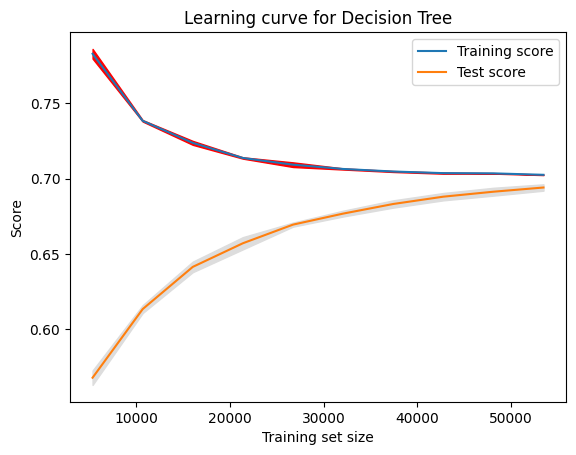

In [50]:
X = x_label_train_tree
y = y_label_train

# Create a Decision Tree
t = DecisionTreeClassifier(random_state=42)

# Compute the learning curve with 5-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    t, X, y, cv=5, train_sizes=np.linspace (0.1, 1.0, 10), return_times=True)

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Test score")

# Fill the area between the mean and the standard deviation of the training and test scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Add labels and title to the plot
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.title("Learning curve for Decision Tree")
plt.legend()
plt.show()

## Decision Tree Model (Imbalanced)

In [197]:
d_range=range(2,20)
tr_scores = []
te_scores = []
for d in d_range:
    t= DecisionTreeClassifier(max_depth=d,random_state=42)
    t.fit(x_label_train_tree, y_label_train)
    tr_scores.append(t.score(x_label_train_tree,y_label_train))
    te_scores.append(t.score(x_label_test_tree,y_label_test))

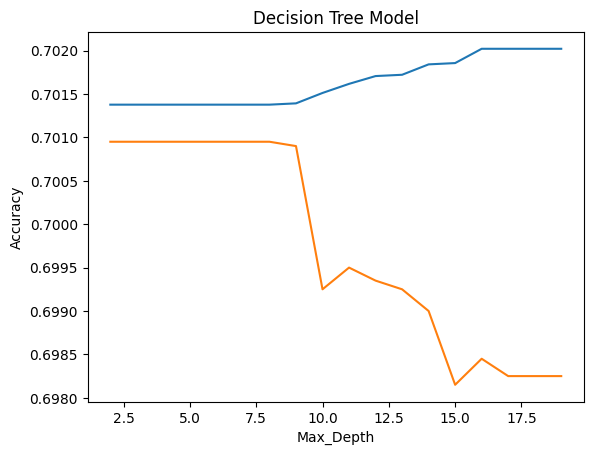

In [198]:
plt.plot(d_range, tr_scores)
plt.plot(d_range, te_scores)
plt.xlabel('Max_Depth')
plt.title("Decision Tree Model")
plt.ylabel('Accuracy')
plt.show()

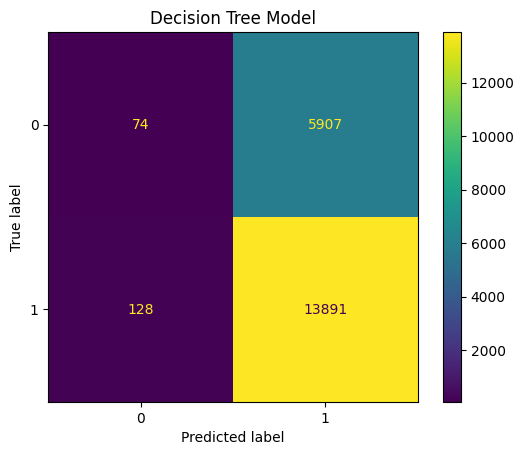

In [200]:
# confusion matrix
y_predect = t.predict(x_label_test_tree)
confusion = confusion_matrix(y_label_test,y_predect)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title("Decision Tree Model")
plt.show()

In [201]:
print(classification_report(y_label_test,y_predect))

              precision    recall  f1-score   support

           0       0.37      0.01      0.02      5981
           1       0.70      0.99      0.82     14019

    accuracy                           0.70     20000
   macro avg       0.53      0.50      0.42     20000
weighted avg       0.60      0.70      0.58     20000



In [202]:
precision = []
recall = []
F1_score = []
precision.append(precision_score(y_label_test,y_predect,average='macro'))
recall.append(recall_score(y_label_test,y_predect,average='macro'))
F1_score.append(f1_score(y_label_test,y_predect,average='macro'))

## Roc Curve

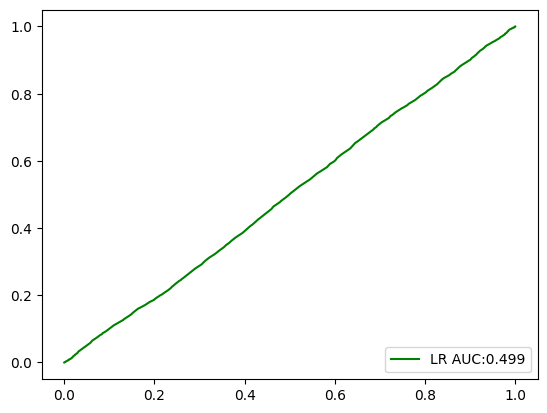

In [203]:
probas_ = t.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate = True)

auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

## Logistic Regression Model (Imbalanced)

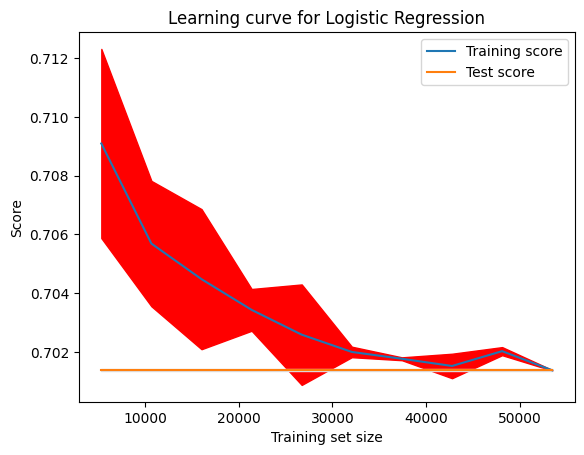

In [204]:
X = x_onehot_train_log
y = y_label_train

# Create a Decision Tree
log = LogisticRegression(solver='lbfgs',C=2,random_state=42)

# Compute the learning curve with 5-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    log, X, y, cv=5, train_sizes=np.linspace (0.1, 1.0, 10), return_times=True)

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Test score")

# Fill the area between the mean and the standard deviation of the training and test scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Add labels and title to the plot
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.title("Learning curve for Logistic Regression")
plt.legend()
plt.show()

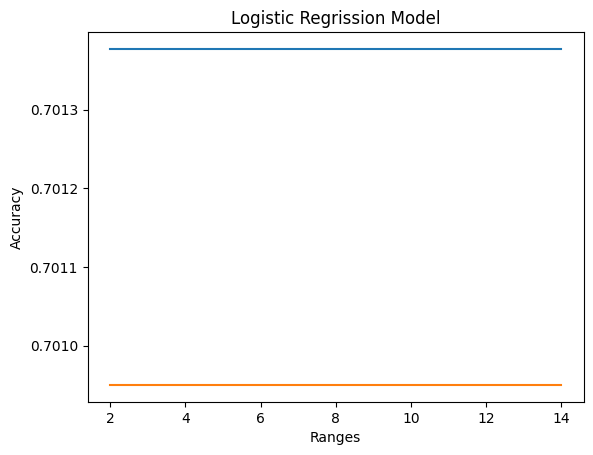

In [205]:
ranges = range(2,15)
tr_scores = []
te_scores = []

for n in ranges:
    log = LogisticRegression(solver='lbfgs',C=n,random_state=42)
    log.fit(x_onehot_train_log, y_label_train)
    tr_scores.append(log.score(x_onehot_train_log,y_label_train))
    te_scores.append(log.score(x_onehot_test_log,y_label_test))


plt.plot(ranges, tr_scores)
plt.plot(ranges, te_scores)
plt.xlabel('Ranges')
plt.title("Logistic Regrission Model")
plt.ylabel('Accuracy')
plt.show()

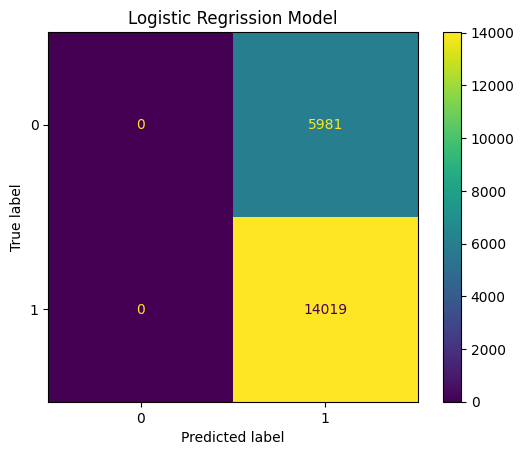

In [206]:
y_predict_log = log.predict(x_onehot_test_log)
confusion = confusion_matrix(y_label_test,y_predict_log)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title("Logistic Regrission Model")
plt.show()

In [207]:
print(classification_report(y_label_test,y_predect))

              precision    recall  f1-score   support

           0       0.37      0.01      0.02      5981
           1       0.70      0.99      0.82     14019

    accuracy                           0.70     20000
   macro avg       0.53      0.50      0.42     20000
weighted avg       0.60      0.70      0.58     20000



In [208]:
precision.append(precision_score(y_label_test,y_predect,average='macro'))
recall.append(recall_score(y_label_test,y_predect,average='macro'))
F1_score.append(f1_score(y_label_test,y_predect,average='macro'))

## Roc Curve

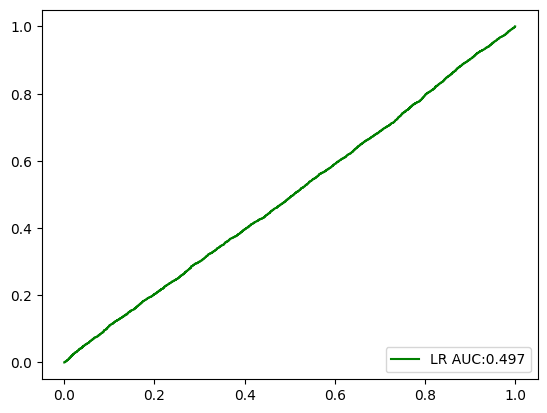

In [209]:
probas_ = log.predict_proba(x_onehot_test_log)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate = True)

auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

## KNN Model (Imbalanced)

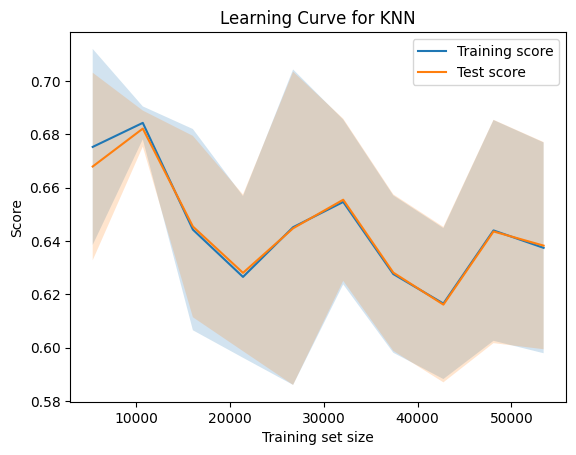

In [210]:
X = x_label_train_KNN
y = y_label_train


knn = KNeighborsClassifier(
    n_neighbors=5,      
    weights='distance'  
)


train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    knn,
    X,
    y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    return_times=True,
    n_jobs=-1
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Test score")

plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2
)
plt.fill_between(
    train_sizes,
    test_mean - test_std,
    test_mean + test_std,
    alpha=0.2
)


plt.xlabel("Training set size")
plt.ylabel("Score")
plt.title("Learning Curve for KNN")
plt.legend()
plt.show()


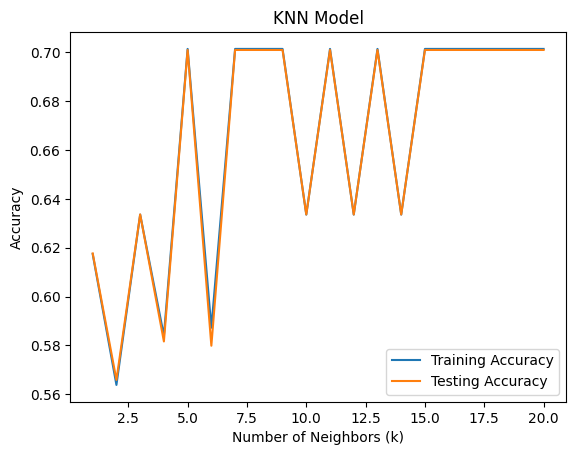

In [211]:
ranges = range(1, 21)   # number of neighbors
tr_scores = []
te_scores = []

for k in ranges:
    
    knn = KNeighborsClassifier( n_neighbors=k,weights='distance')
    knn.fit(x_label_train_KNN, y_label_train)
    tr_scores.append(knn.score(x_label_train_KNN, y_label_train))
    te_scores.append(knn.score(x_label_test_KNN, y_label_test))

plt.plot(ranges, tr_scores, label='Training Accuracy')
plt.plot(ranges, te_scores, label='Testing Accuracy')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Model")
plt.legend()
plt.show()

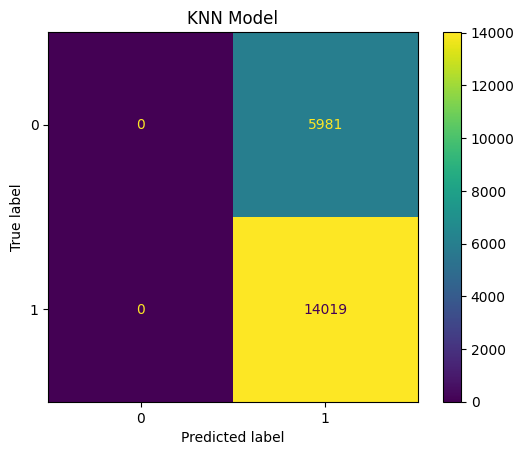

In [212]:
# confusion matrix
y_predect_rand = knn.predict(x_label_test_KNN)
confusion = confusion_matrix(y_label_test,y_predect_rand)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title("KNN Model")
plt.show()

In [213]:
print(classification_report(y_label_test,y_predect))

              precision    recall  f1-score   support

           0       0.37      0.01      0.02      5981
           1       0.70      0.99      0.82     14019

    accuracy                           0.70     20000
   macro avg       0.53      0.50      0.42     20000
weighted avg       0.60      0.70      0.58     20000



In [214]:
precision.append(precision_score(y_label_test,y_predect,average='macro'))
recall.append(recall_score(y_label_test,y_predect,average='macro'))
F1_score.append(f1_score(y_label_test,y_predect,average='macro'))

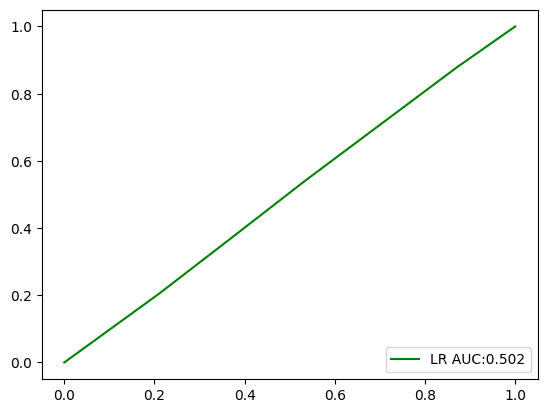

In [215]:
probas_ = knn.predict_proba(x_label_test_KNN)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate = True)

auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

## Ensemble Model (AdaBoost)

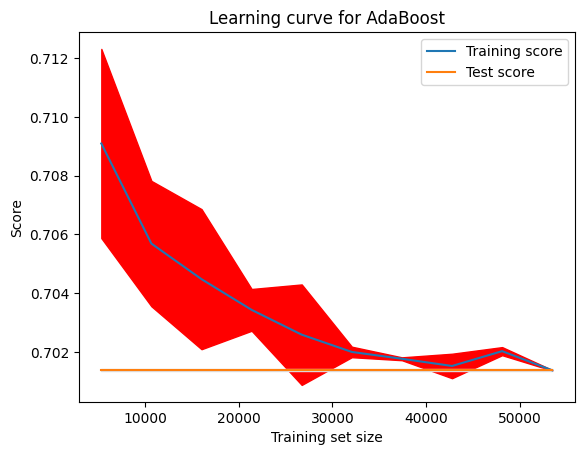

In [216]:
X = x_label_train_tree
y = y_label_train

# Create a Decision Tree
ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # decision stump
        n_estimators=n,
        learning_rate=0.1,
        random_state=42
    )

# Compute the learning curve with 5-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    ada, X, y, cv=5, train_sizes=np.linspace (0.1, 1.0, 10), return_times=True)

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Test score")

# Fill the area between the mean and the standard deviation of the training and test scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Add labels and title to the plot
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.title("Learning curve for AdaBoost")
plt.legend()
plt.show()

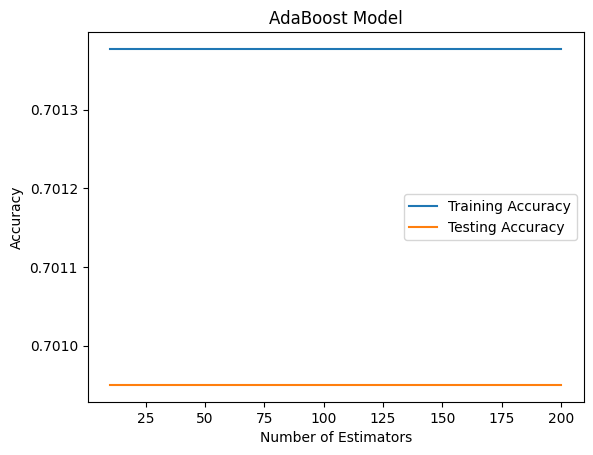

In [217]:
ranges = range(10, 210, 10)   # number of estimators
tr_scores = []
te_scores = []

for n in ranges:
    
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # decision stump
        n_estimators=n,
        learning_rate=0.1,
        random_state=42
    )
    
    ada.fit(x_label_train_tree, y_label_train)
    
    tr_scores.append(ada.score(x_label_train_tree, y_label_train))
    te_scores.append(ada.score(x_label_test_tree, y_label_test))

plt.plot(ranges, tr_scores, label='Training Accuracy')
plt.plot(ranges, te_scores, label='Testing Accuracy')

plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Model")
plt.legend()
plt.show()

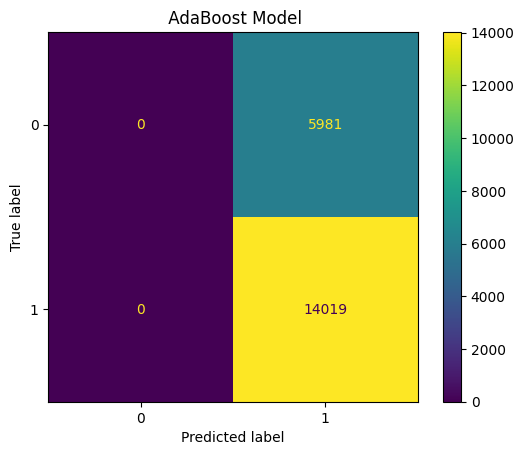

In [218]:
# confusion matrix
y_predect = ada.predict(x_label_test_tree)
confusion = confusion_matrix(y_label_test,y_predect)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title(" AdaBoost Model")
plt.show()

In [219]:
print(classification_report(y_label_test,y_predect))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5981
           1       0.70      1.00      0.82     14019

    accuracy                           0.70     20000
   macro avg       0.35      0.50      0.41     20000
weighted avg       0.49      0.70      0.58     20000



C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [220]:
precision.append(precision_score(y_label_test,y_predect,average='macro'))
recall.append(recall_score(y_label_test,y_predect,average='macro'))
F1_score.append(f1_score(y_label_test,y_predect,average='macro'))

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


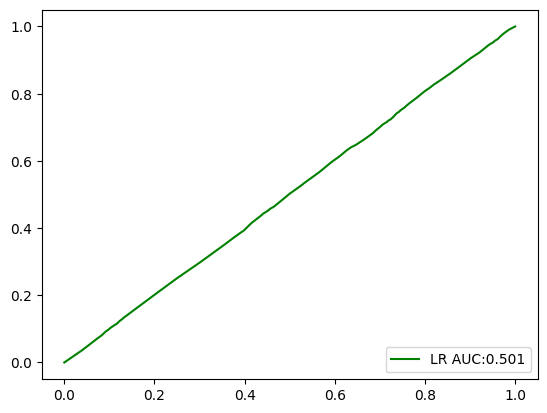

In [221]:
probas_ = ada.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate = True)

auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

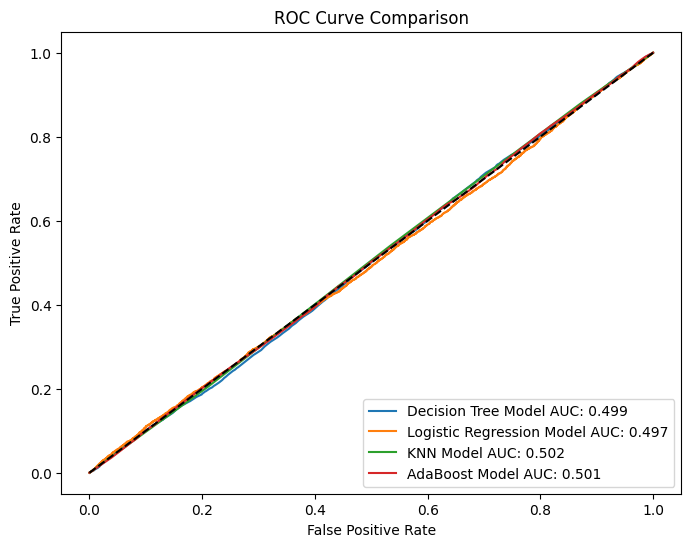

In [192]:
plt.figure(figsize=(8, 6))


probas_ = t.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate=True)
auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, label='Decision Tree Model AUC: %.3f' % auc)



probas_ = log.predict_proba(x_onehot_test_log)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate=True)
auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, label='Logistic Regression Model AUC: %.3f' % auc)



probas_ = knn.predict_proba(x_label_test_KNN)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate=True)
auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, label='KNN Model AUC: %.3f' % auc)


probas_ = ada.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate=True)
auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, label='AdaBoost Model AUC: %.3f' % auc)



plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc=4)
plt.show()


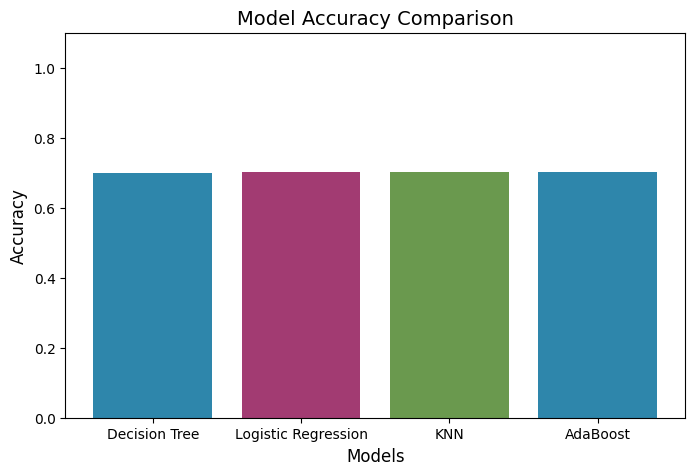

In [223]:
# model accuracy comparison
accuracy = [
    t.score(x_label_test_tree, y_label_test),
    log.score(x_onehot_test_log, y_label_test),
    knn.score(x_label_test_KNN, y_label_test),
    ada.score(x_label_test_tree, y_label_test),
]

model_names = ['Decision Tree', 'Logistic Regression', 'KNN','AdaBoost']


plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracy, color=['#2E86AB', '#A23B72', '#6A994E','#2E86AB'])

plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.ylim(0, 1.1)
plt.show()

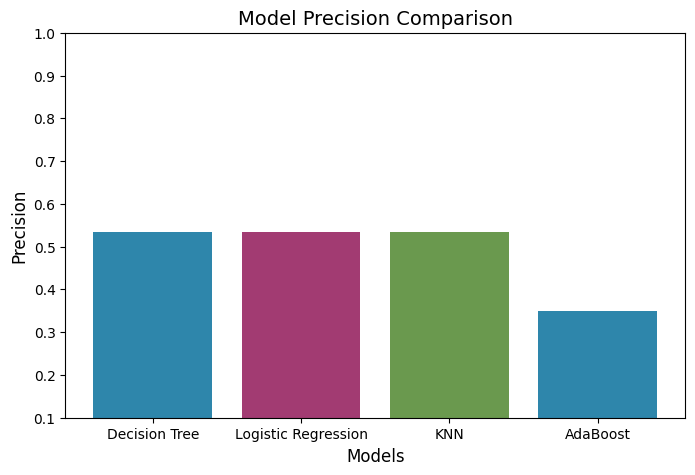

In [227]:
# model precision comparison
plt.figure(figsize=(8, 5))
plt.bar(model_names, precision, color=['#2E86AB', '#A23B72', '#6A994E','#2E86AB'])

plt.title("Model Precision Comparison", fontsize=14)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.ylim(0.1, 1)
plt.show()

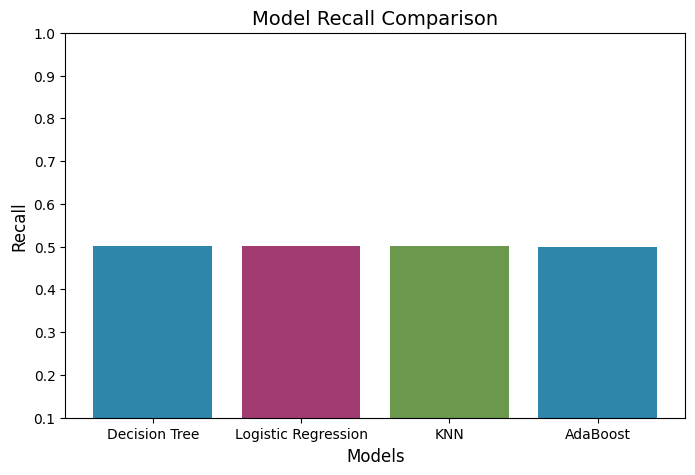

In [228]:
# model recall comparison
plt.figure(figsize=(8, 5))
plt.bar(model_names, recall, color=['#2E86AB', '#A23B72', '#6A994E','#2E86AB'])

plt.title("Model Recall Comparison", fontsize=14)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.ylim(0.1, 1)
plt.show()

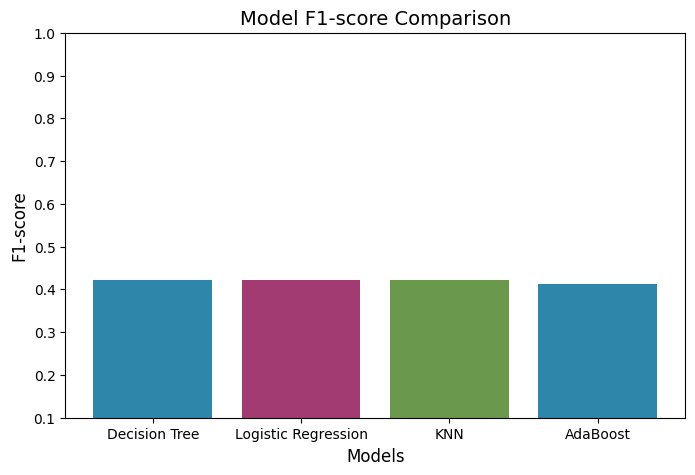

In [229]:
# model F1_Score comparison
plt.figure(figsize=(8, 5))
plt.bar(model_names, F1_score, color=['#2E86AB', '#A23B72', '#6A994E','#2E86AB'])

plt.title("Model F1-score Comparison", fontsize=14)
plt.ylabel("F1-score", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.ylim(0.1, 1)
plt.show()

## Handling Class Imbalance Problem

In [103]:
rus = RandomUnderSampler(
    sampling_strategy='auto',   # equalize to minority class
    random_state=42
)

x_label_train_tree_balanced, y_train_tree_balanced = rus.fit_resample(x_label_train_tree, y_label_train)

print("After Random Undersampling:", Counter(y_train_tree_balanced))

After Random Undersampling: Counter({0: 19948, 1: 19948})


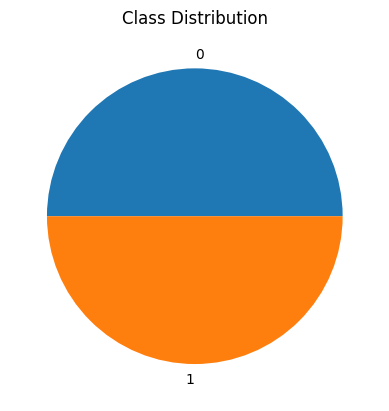

In [104]:
plt.pie(y_train_tree_balanced.value_counts(), labels=y_train_tree_balanced.value_counts().index)
plt.title("Class Distribution")
plt.show()

In [111]:
ros = RandomOverSampler(
    sampling_strategy='auto',   # equalize to majority class
    random_state=42
)

x_label_train_tree_balanced_ov, y_train_tree_balanced_ov = ros.fit_resample(x_label_train_tree, y_label_train)

print("After Random Oversampling:", Counter(y_train_tree_balanced_ov))

After Random Oversampling: Counter({1: 46852, 0: 46852})


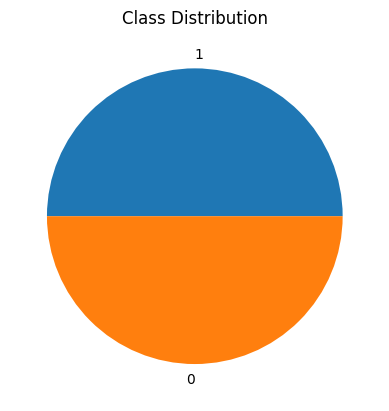

In [112]:
plt.pie(y_train_tree_balanced_ov.value_counts(), labels=y_train_tree_balanced_ov.value_counts().index)
plt.title("Class Distribution")
plt.show()

In [119]:
smote = SMOTE(
    sampling_strategy='auto',   # equalize all classes
    random_state=42,
    k_neighbors=5
)

x_label_train_tree_balanced_smote, y_train_tree_balanced_smote = smote.fit_resample(x_label_train_tree, y_label_train)

print("After SMOTE:", Counter(y_train_tree_balanced_smote))

After SMOTE: Counter({1: 46852, 0: 46852})


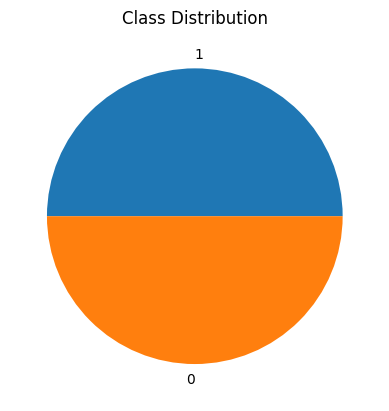

In [120]:
plt.pie(y_train_tree_balanced_smote.value_counts(), labels=y_train_tree_balanced_smote.value_counts().index)
plt.title("Class Distribution")
plt.show()

## Decision Tree Model (Undersampling)

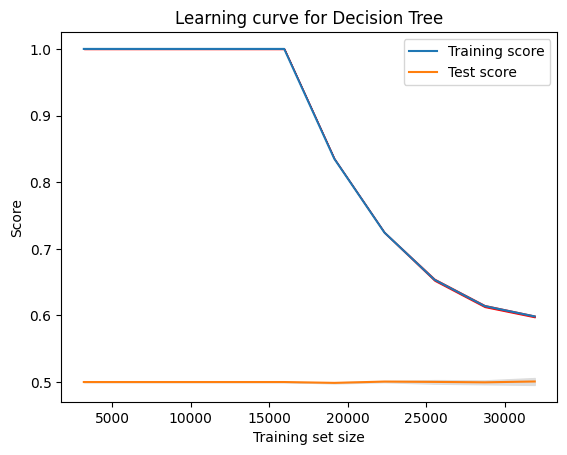

In [231]:
X = x_label_train_tree_balanced
y = y_train_tree_balanced

# Create a Decision Tree
t1 = DecisionTreeClassifier(random_state=42)

# Compute the learning curve with 5-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    t1, X, y, cv=5, train_sizes=np.linspace (0.1, 1.0, 10), return_times=True)

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Test score")

# Fill the area between the mean and the standard deviation of the training and test scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Add labels and title to the plot
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.title("Learning curve for Decision Tree")
plt.legend()
plt.show()

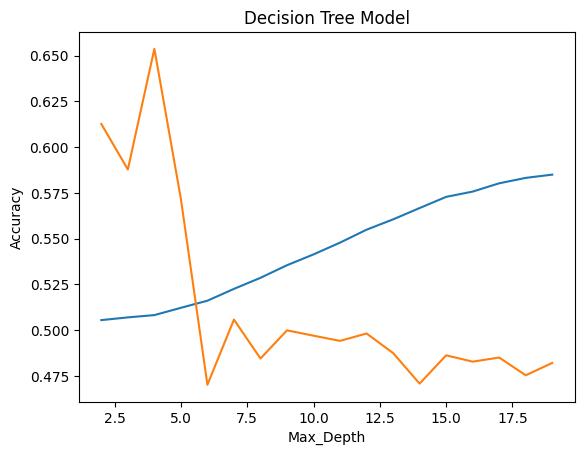

In [232]:
d_range=range(2,20)
tr_scores = []
te_scores = []
for d in d_range:
    t1= DecisionTreeClassifier(max_depth=d,random_state=42)
    t1.fit(x_label_train_tree_balanced, y_train_tree_balanced)
    tr_scores.append(t1.score(x_label_train_tree_balanced,y_train_tree_balanced))
    te_scores.append(t1.score(x_label_test_tree,y_label_test))

plt.plot(d_range, tr_scores)
plt.plot(d_range, te_scores)
plt.xlabel('Max_Depth')
plt.title("Decision Tree Model")
plt.ylabel('Accuracy')
plt.show()

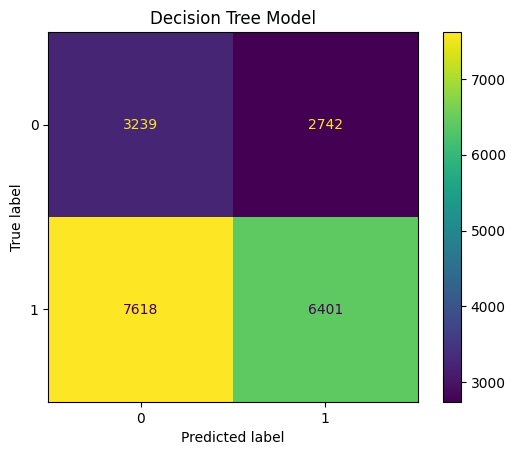

In [233]:
# confusion matrix
y_predect = t1.predict(x_label_test_tree)
confusion = confusion_matrix(y_label_test,y_predect)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title("Decision Tree Model")
plt.show()

In [234]:
print(classification_report(y_label_test,y_predect))

              precision    recall  f1-score   support

           0       0.30      0.54      0.38      5981
           1       0.70      0.46      0.55     14019

    accuracy                           0.48     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.58      0.48      0.50     20000



In [235]:
precision_b = []
recall_b = []
F1_score_b = []
precision_b.append(precision_score(y_label_test,y_predect,average='macro'))
recall_b.append(recall_score(y_label_test,y_predect,average='macro'))
F1_score_b.append(f1_score(y_label_test,y_predect,average='macro'))

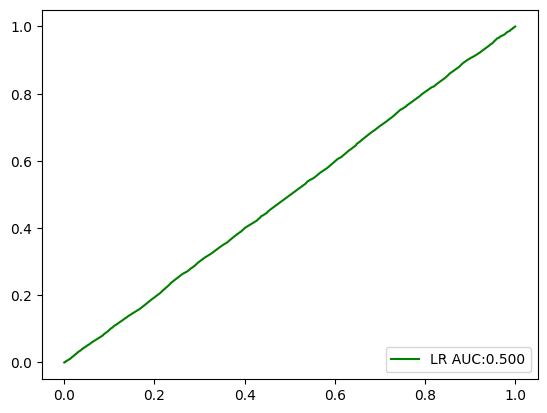

In [236]:
probas_ = t1.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate = True)

auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

## Decision Tree Model (Oversampling)

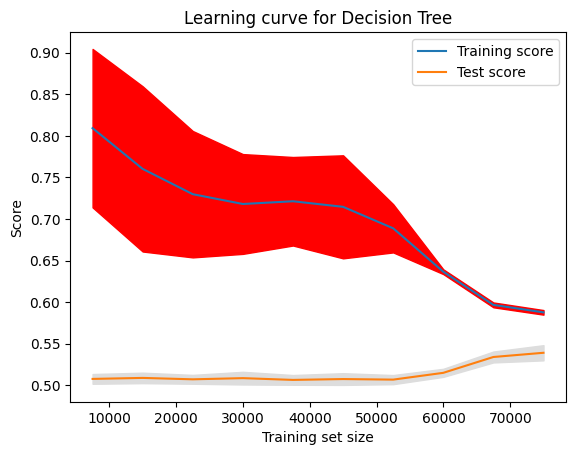

In [237]:
X = x_label_train_tree_balanced_ov
y = y_train_tree_balanced_ov

# Create a Decision Tree
t2 = DecisionTreeClassifier(random_state=42)

# Compute the learning curve with 5-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    t2, X, y, cv=5, train_sizes=np.linspace (0.1, 1.0, 10), return_times=True)

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Test score")

# Fill the area between the mean and the standard deviation of the training and test scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Add labels and title to the plot
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.title("Learning curve for Decision Tree")
plt.legend()
plt.show()

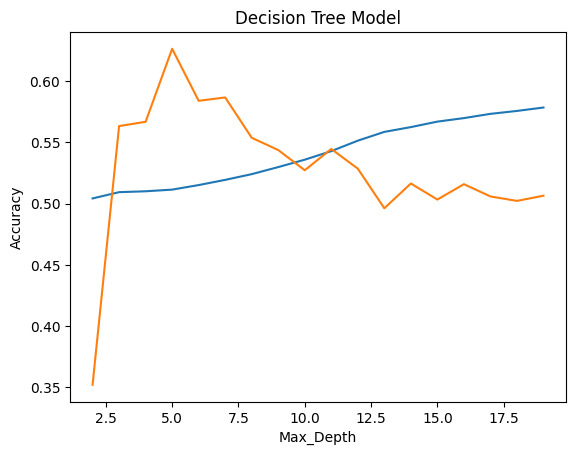

In [238]:
d_range=range(2,20)
tr_scores = []
te_scores = []
for d in d_range:
    t2= DecisionTreeClassifier(max_depth=d,random_state=42)
    t2.fit(x_label_train_tree_balanced_ov, y_train_tree_balanced_ov)
    tr_scores.append(t2.score(x_label_train_tree_balanced_ov,y_train_tree_balanced_ov))
    te_scores.append(t2.score(x_label_test_tree,y_label_test))

plt.plot(d_range, tr_scores)
plt.plot(d_range, te_scores)
plt.xlabel('Max_Depth')
plt.title("Decision Tree Model")
plt.ylabel('Accuracy')
plt.show()

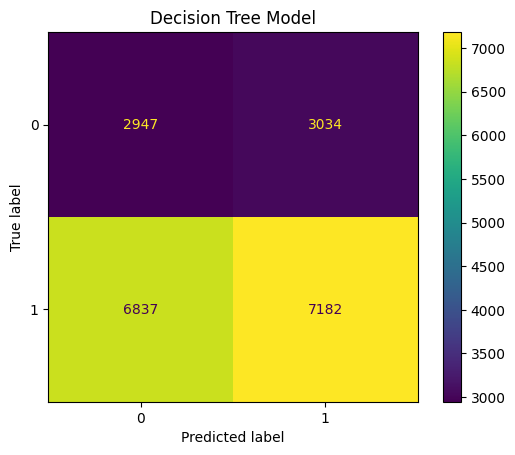

In [239]:
# confusion matrix
y_predect = t2.predict(x_label_test_tree)
confusion = confusion_matrix(y_label_test,y_predect)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title("Decision Tree Model")
plt.show()

In [240]:
print(classification_report(y_label_test,y_predect))

              precision    recall  f1-score   support

           0       0.30      0.49      0.37      5981
           1       0.70      0.51      0.59     14019

    accuracy                           0.51     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.58      0.51      0.53     20000



In [241]:
precision_b.append(precision_score(y_label_test,y_predect,average='macro'))
recall_b.append(recall_score(y_label_test,y_predect,average='macro'))
F1_score_b.append(f1_score(y_label_test,y_predect,average='macro'))

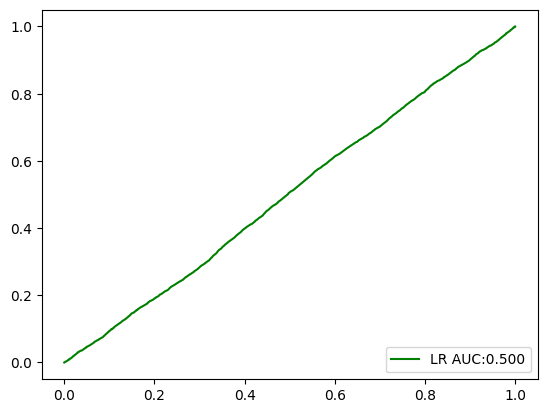

In [242]:
probas_ = t2.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate = True)

auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

## Decision Tree Model (SMOTE)

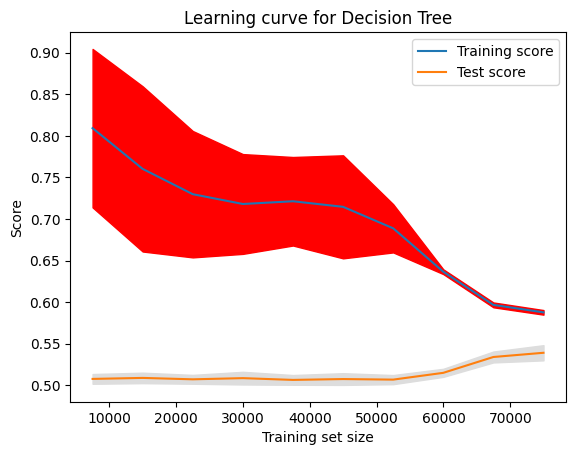

In [243]:
X = x_label_train_tree_balanced_smote
y = y_train_tree_balanced_smote

# Create a Decision Tree
t3 = DecisionTreeClassifier(random_state=42)

# Compute the learning curve with 5-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    t3, X, y, cv=5, train_sizes=np.linspace (0.1, 1.0, 10), return_times=True)

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Test score")

# Fill the area between the mean and the standard deviation of the training and test scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Add labels and title to the plot
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.title("Learning curve for Decision Tree")
plt.legend()
plt.show()

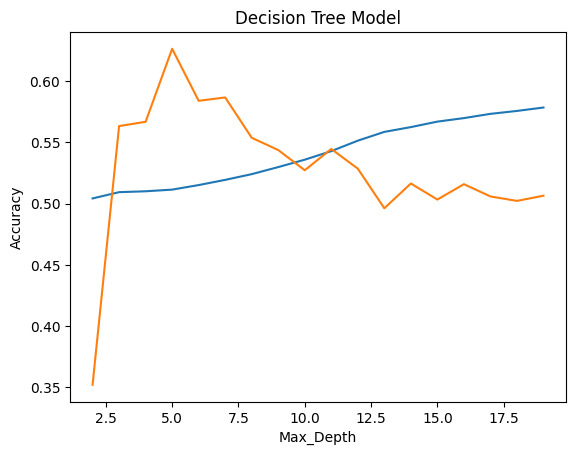

In [244]:
d_range=range(2,20)
tr_scores = []
te_scores = []
for d in d_range:
    t3= DecisionTreeClassifier(max_depth=d,random_state=42)
    t3.fit(x_label_train_tree_balanced_smote, y_train_tree_balanced_smote)
    tr_scores.append(t3.score(x_label_train_tree_balanced_smote,y_train_tree_balanced_smote))
    te_scores.append(t3.score(x_label_test_tree,y_label_test))

plt.plot(d_range, tr_scores)
plt.plot(d_range, te_scores)
plt.xlabel('Max_Depth')
plt.title("Decision Tree Model")
plt.ylabel('Accuracy')
plt.show()

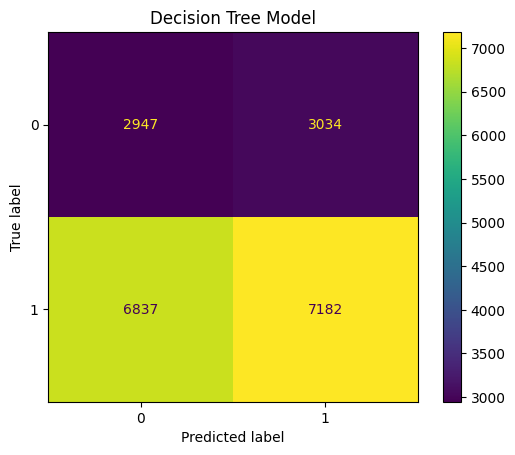

In [245]:
# confusion matrix
y_predect = t3.predict(x_label_test_tree)
confusion = confusion_matrix(y_label_test,y_predect)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title("Decision Tree Model")
plt.show()

In [246]:
print(classification_report(y_label_test,y_predect))

              precision    recall  f1-score   support

           0       0.30      0.49      0.37      5981
           1       0.70      0.51      0.59     14019

    accuracy                           0.51     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.58      0.51      0.53     20000



In [247]:
precision_b.append(precision_score(y_label_test,y_predect,average='macro'))
recall_b.append(recall_score(y_label_test,y_predect,average='macro'))
F1_score_b.append(f1_score(y_label_test,y_predect,average='macro'))

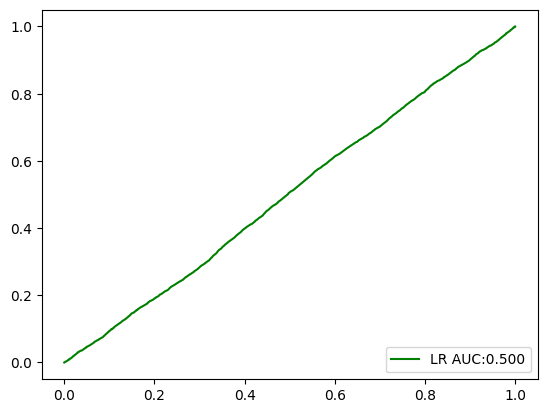

In [248]:
probas_ = t3.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate = True)

auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

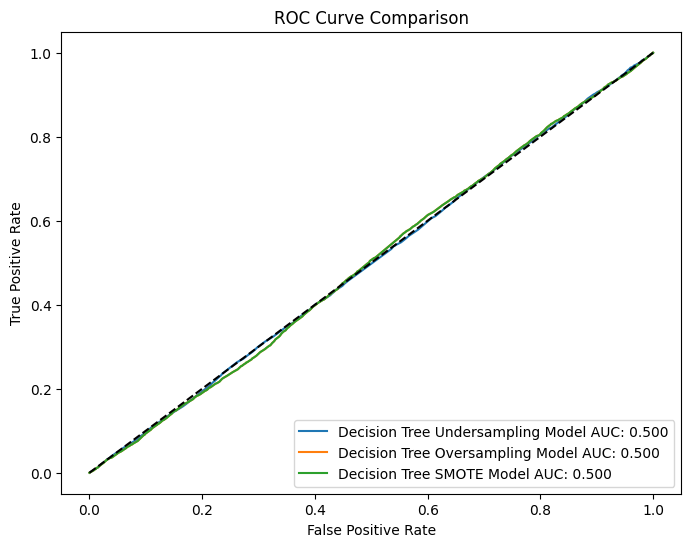

In [249]:
plt.figure(figsize=(8, 6))


probas_ = t1.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate=True)
auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, label='Decision Tree Undersampling Model AUC: %.3f' % auc)



probas_ = t2.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate=True)
auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, label='Decision Tree Oversampling Model AUC: %.3f' % auc)



probas_ = t3.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate=True)
auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, label='Decision Tree SMOTE Model AUC: %.3f' % auc)




plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc=4)
plt.show()


## AdaBoost Model (Undersampling)

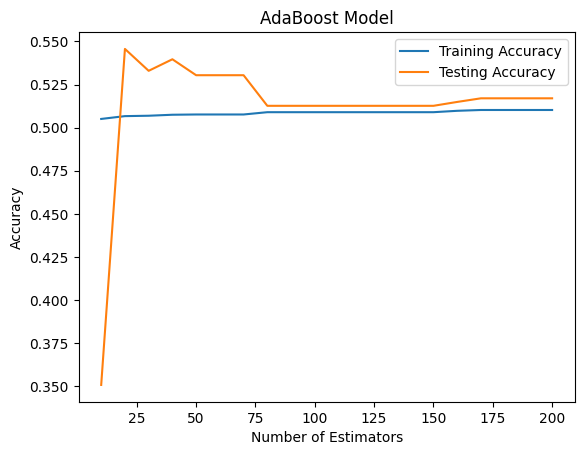

In [257]:
ranges = range(10, 210, 10)  
tr_scores = []
te_scores = []

for n in ranges:
    
    ada1 = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # decision stump
        n_estimators=n,
        learning_rate=0.1,
        random_state=42
    )
    
    ada1.fit(x_label_train_tree_balanced, y_train_tree_balanced)
    
    tr_scores.append(ada1.score(x_label_train_tree_balanced, y_train_tree_balanced))
    te_scores.append(ada1.score(x_label_test_tree, y_label_test))

plt.plot(ranges, tr_scores, label='Training Accuracy')
plt.plot(ranges, te_scores, label='Testing Accuracy')

plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Model")
plt.legend()
plt.show()

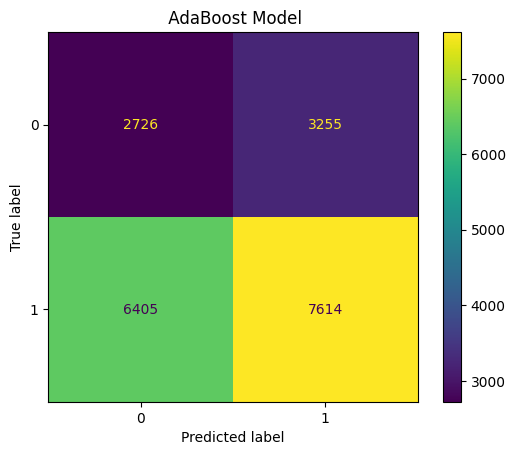

In [258]:
# confusion matrix
y_predect = ada1.predict(x_label_test_tree)
confusion = confusion_matrix(y_label_test,y_predect)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title(" AdaBoost Model")
plt.show()

In [259]:
print(classification_report(y_label_test,y_predect))

              precision    recall  f1-score   support

           0       0.30      0.46      0.36      5981
           1       0.70      0.54      0.61     14019

    accuracy                           0.52     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.58      0.52      0.54     20000



In [260]:
precision_b.append(precision_score(y_label_test,y_predect,average='macro'))
recall_b.append(recall_score(y_label_test,y_predect,average='macro'))
F1_score_b.append(f1_score(y_label_test,y_predect,average='macro'))

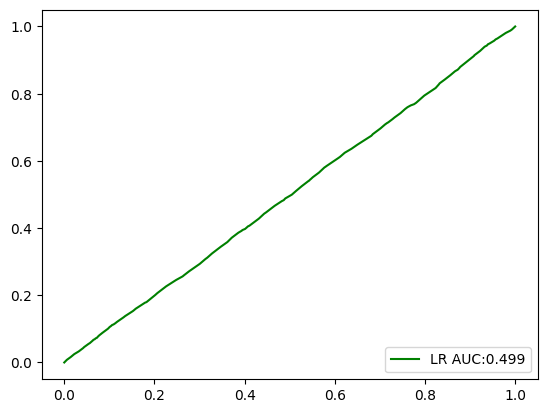

In [261]:
probas_ = ada1.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate = True)

auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

## AdaBoost Model (Oversampling)

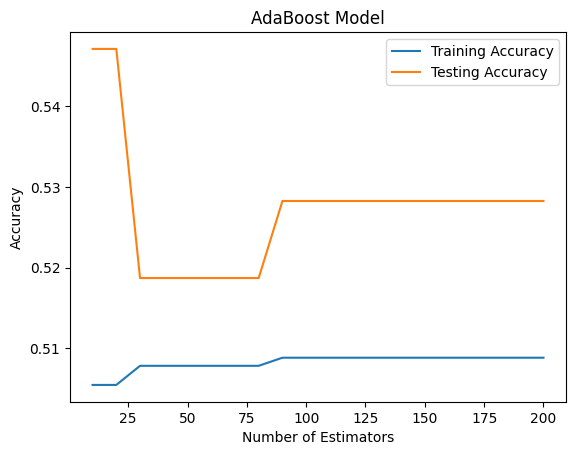

In [262]:
ranges = range(10, 210, 10)   # number of estimators
tr_scores = []
te_scores = []

for n in ranges:
    
    ada2 = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # decision stump
        n_estimators=n,
        learning_rate=0.1,
        random_state=42
    )
    
    ada2.fit(x_label_train_tree_balanced_ov, y_train_tree_balanced_ov)
    
    tr_scores.append(ada2.score(x_label_train_tree_balanced_ov, y_train_tree_balanced_ov))
    te_scores.append(ada2.score(x_label_test_tree, y_label_test))

plt.plot(ranges, tr_scores, label='Training Accuracy')
plt.plot(ranges, te_scores, label='Testing Accuracy')

plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Model")
plt.legend()
plt.show()

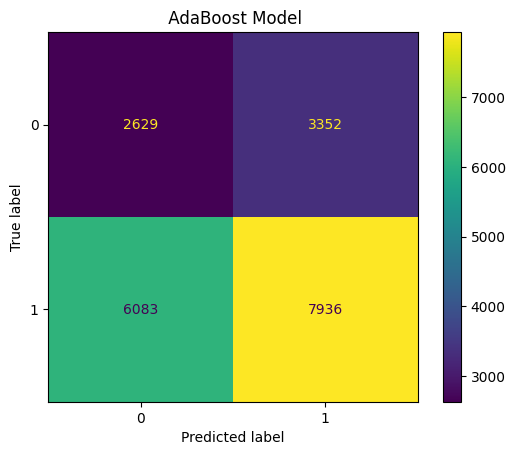

In [263]:
# confusion matrix
y_predect = ada2.predict(x_label_test_tree)
confusion = confusion_matrix(y_label_test,y_predect)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title(" AdaBoost Model")
plt.show()

In [264]:
print(classification_report(y_label_test,y_predect))

              precision    recall  f1-score   support

           0       0.30      0.44      0.36      5981
           1       0.70      0.57      0.63     14019

    accuracy                           0.53     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.58      0.53      0.55     20000



In [265]:
precision_b.append(precision_score(y_label_test,y_predect,average='macro'))
recall_b.append(recall_score(y_label_test,y_predect,average='macro'))
F1_score_b.append(f1_score(y_label_test,y_predect,average='macro'))

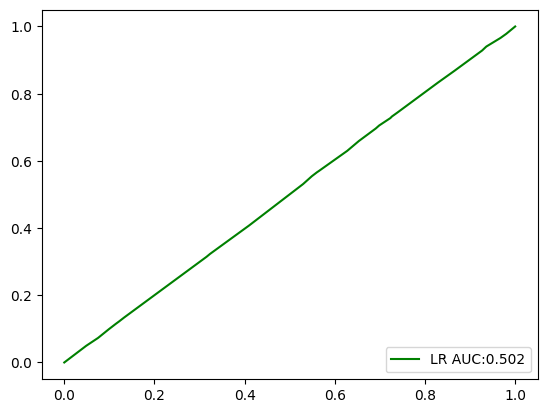

In [266]:
probas_ = ada2.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate = True)

auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

## AdaBoost Model (SMOTE)

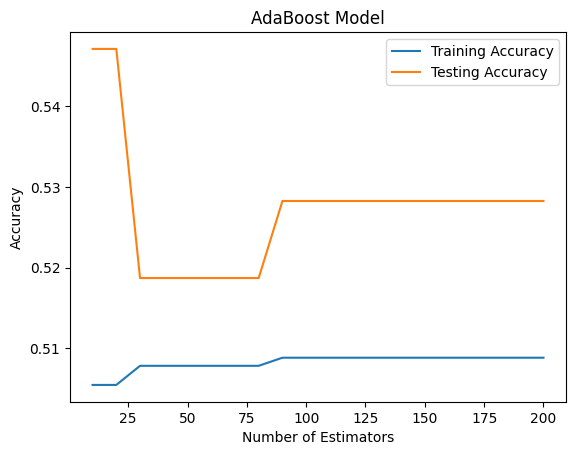

In [267]:
ranges = range(10, 210, 10)   # number of estimators
tr_scores = []
te_scores = []

for n in ranges:
    
    ada3 = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # decision stump
        n_estimators=n,
        learning_rate=0.1,
        random_state=42
    )
    
    ada3.fit(x_label_train_tree_balanced_smote, y_train_tree_balanced_smote)
    
    tr_scores.append(ada3.score(x_label_train_tree_balanced_smote, y_train_tree_balanced_smote))
    te_scores.append(ada3.score(x_label_test_tree, y_label_test))

plt.plot(ranges, tr_scores, label='Training Accuracy')
plt.plot(ranges, te_scores, label='Testing Accuracy')

plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Model")
plt.legend()
plt.show()

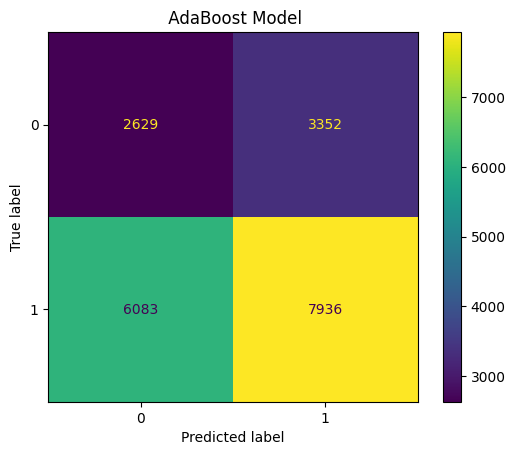

In [268]:
# confusion matrix
y_predect = ada3.predict(x_label_test_tree)
confusion = confusion_matrix(y_label_test,y_predect)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()
plt.title(" AdaBoost Model")
plt.show()

In [269]:
print(classification_report(y_label_test,y_predect))

              precision    recall  f1-score   support

           0       0.30      0.44      0.36      5981
           1       0.70      0.57      0.63     14019

    accuracy                           0.53     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.58      0.53      0.55     20000



In [270]:
precision_b.append(precision_score(y_label_test,y_predect,average='macro'))
recall_b.append(recall_score(y_label_test,y_predect,average='macro'))
F1_score_b.append(f1_score(y_label_test,y_predect,average='macro'))

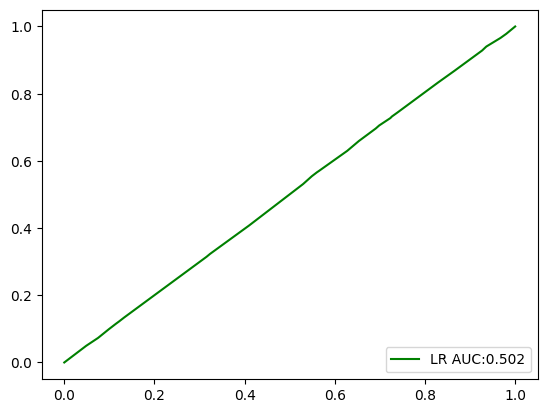

In [271]:
probas_ = ada3.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate = True)

auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

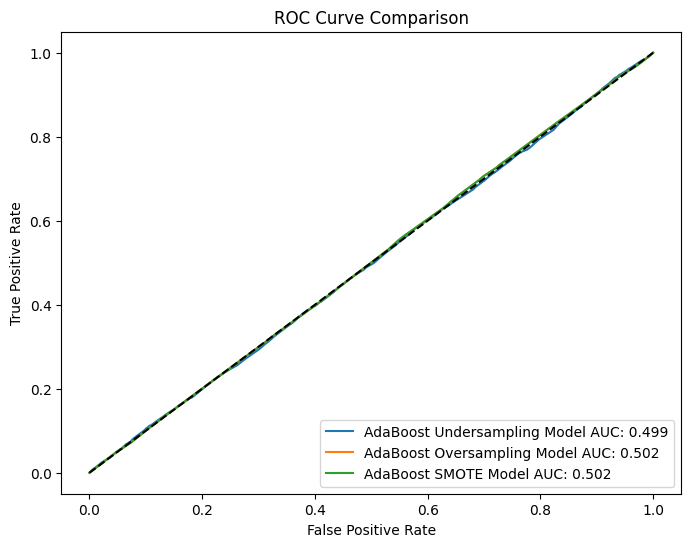

In [272]:
plt.figure(figsize=(8, 6))


probas_ = ada1.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate=True)
auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, label='AdaBoost Undersampling Model AUC: %.3f' % auc)



probas_ = ada2.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate=True)
auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, label='AdaBoost Oversampling Model AUC: %.3f' % auc)



probas_ = ada3.predict_proba(x_label_test_tree)
fpr, tpr, thresholds = roc_curve(y_label_test, probas_[:, 1], drop_intermediate=True)
auc = roc_auc_score(y_label_test, probas_[:, 1])

plt.plot(fpr, tpr, label='AdaBoost SMOTE Model AUC: %.3f' % auc)




plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc=4)
plt.show()


In [280]:
import os
import mlflow
import mlflow.sklearn
import sklearn

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



mlflow_dir = "./mlruns"
os.makedirs(mlflow_dir, exist_ok=True)

mlflow.set_tracking_uri(f"file:{mlflow_dir}")
mlflow.set_experiment("My_Local_Experiment")



categorical_cols = x_train.select_dtypes(include=["object", "category"]).columns
numerical_cols = x_train.select_dtypes(exclude=["object", "category"]).columns



numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)



models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric="euclidean")
}


for model_name, model in models.items():

    with mlflow.start_run(run_name=f"{model_name}_run"):

        pipeline = Pipeline(steps=[
            ("preprocess", preprocessor),
            ("model", model)
        ])

       
        pipeline.fit(x_train, y_train)

       
        y_train_pred = pipeline.predict(x_train)
        y_test_pred = pipeline.predict(x_test)

       
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        test_precision = precision_score(y_test, y_test_pred, average="macro")
        test_recall = recall_score(y_test, y_test_pred, average="macro")
        test_f1 = f1_score(y_test, y_test_pred, average="macro")

       
        mlflow.log_params(model.get_params())

        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("test_accuracy", test_accuracy)
        mlflow.log_metric("precision", test_precision)
        mlflow.log_metric("recall", test_recall)
        mlflow.log_metric("f1_score", test_f1)

        mlflow.sklearn.log_model(
            sk_model=pipeline,
            artifact_path=model_name.replace(" ", "_")
        )

        print(f" MLflow run completed for {model_name}")


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2025/12/20 22:19:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


 MLflow run completed for Logistic Regression


2025/12/20 22:21:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


 MLflow run completed for Random Forest


2025/12/20 22:21:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


 MLflow run completed for KNN
